In [8]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rc('font', family='Malgun Gothic')

## 부산 특별시 관련 신고 데이터 파악

부산 특별시 기초구역도

In [9]:
busan = './data/부산_수집데이터/부산_읍면동/LSMD_ADM_SECT_UMD_26_202309.shp'
busan = gpd.read_file(busan, encoding='cp949')
busan = busan.to_crs(epsg=4326)
print(busan.crs) 

EPSG:4326


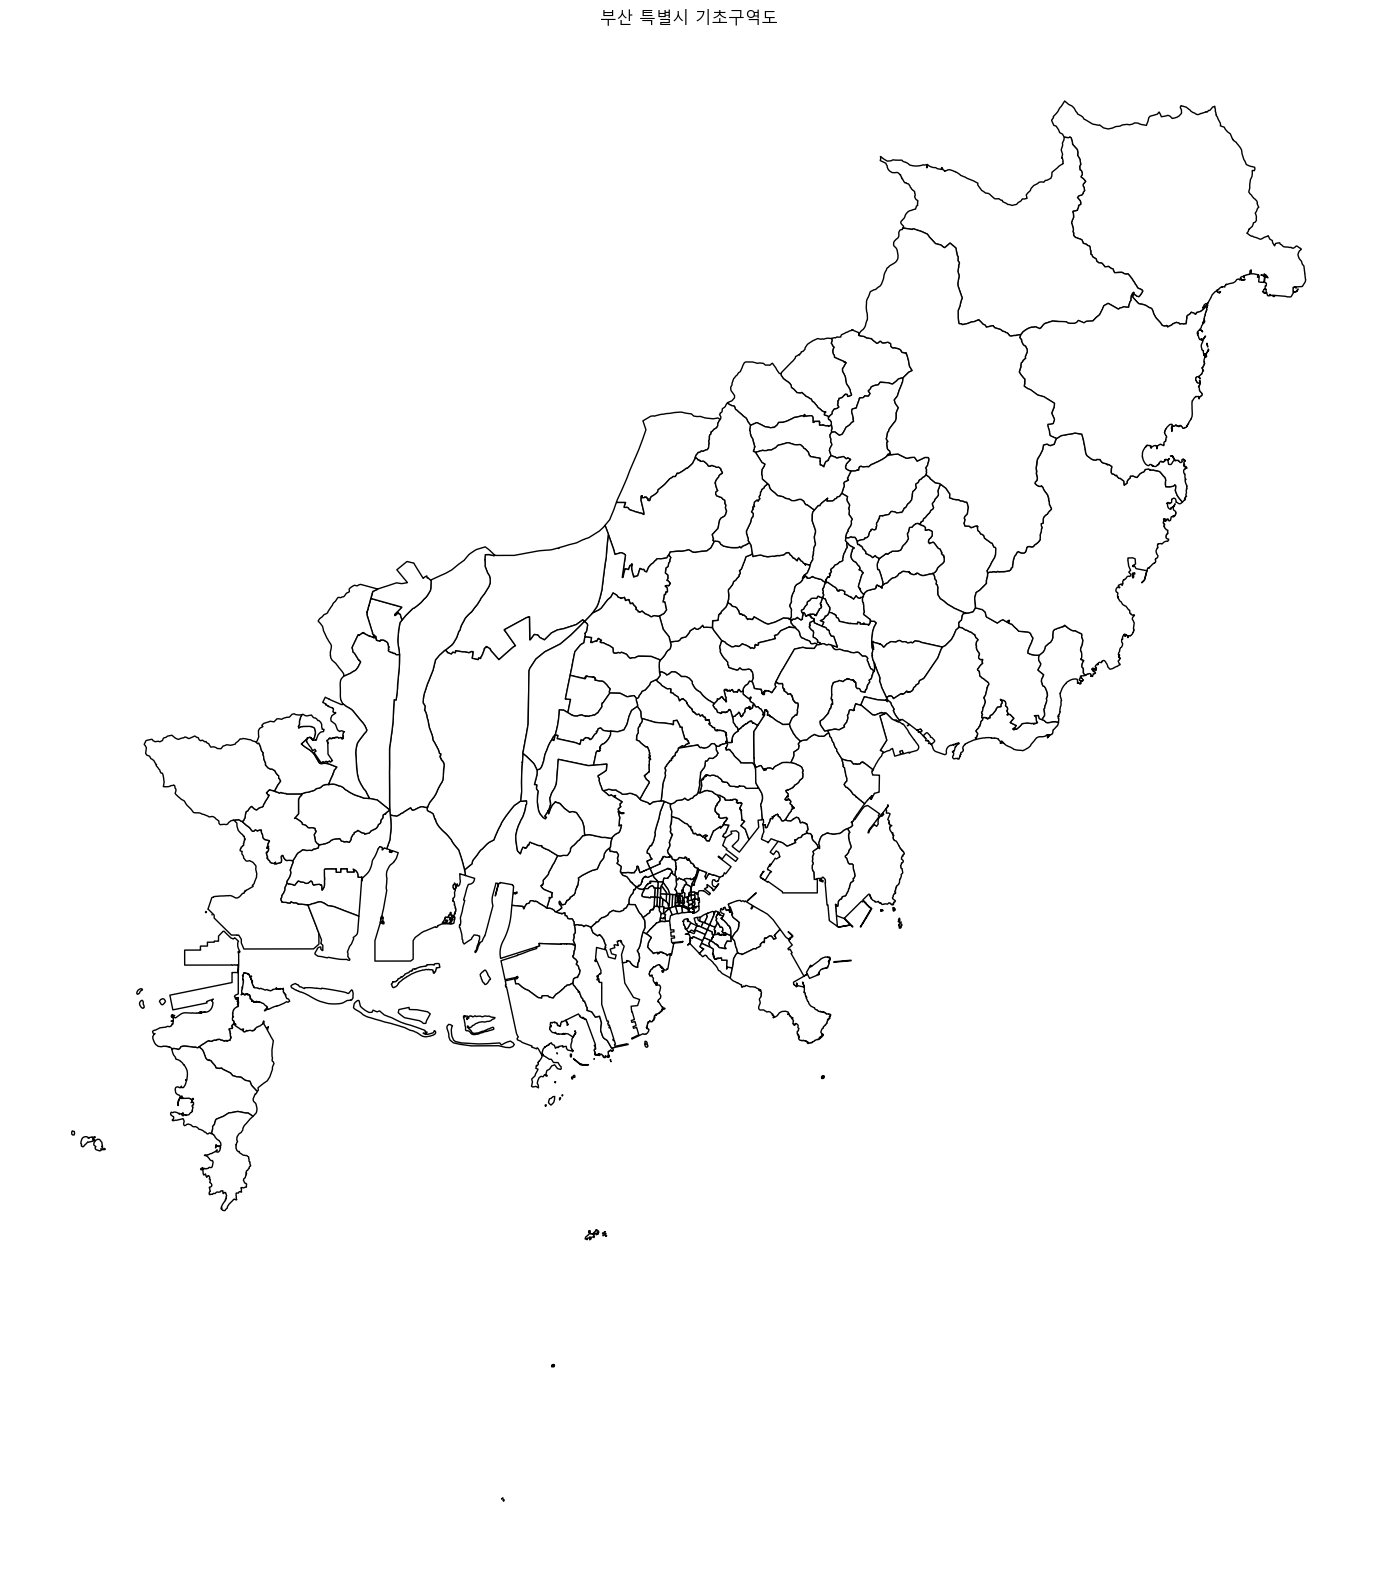

In [10]:
## 부산 특별시 기초구역도
ax = busan.plot(figsize=(20, 20), color="w", edgecolor="k")
ax.set_title("부산 특별시 기초구역도")
ax.set_axis_off()
plt.show()

신고데이터(불법좌회전)

In [11]:
left = pd.read_excel('./data/부산_신고데이터/불법좌회전_busan.xlsx')
left = left[['주소','경도','위도','시군구','읍면동']]
left

주소          경도         위도   시군구    읍면동
0      부산광역시 부산진구 양정동 322번길  129.072358  35.176558  부산진구    양정동
1      부산광역시 해운대구 송정동 451번길  129.201086  35.183910  해운대구    송정동
2      부산광역시 부산진구 전포동 834번길  129.071515  35.153933  부산진구    전포동
3      부산광역시 부산진구 전포동 336번길  129.068387  35.154525  부산진구    전포동
4      부산광역시 연제구 연산동 1530번길  129.087269  35.185579   연제구    연산동
...                     ...         ...        ...   ...    ...
4638   부산광역시 강서구 명지동 2984번길  128.912755  35.089097   강서구    명지동
4639  부산광역시 영도구 남항동1가 232번길  129.039337  35.089226   영도구  남항동1가
4640    부산광역시 동래구 사직동 161번길  129.070428  35.200899   동래구    사직동
4641   부산광역시 해운대구 좌동 1390번길  129.168144  35.180199  해운대구     좌동
4642   부산광역시 부산진구 부암동 519번길  129.036210  35.170165  부산진구    부암동

[4643 rows x 5 columns]

In [12]:
filtered_values = left[['경도', '위도']].value_counts().head(10).reset_index()
filtered_values.columns = ['경도', '위도', 'count']
filtered_values

경도         위도  count
0  128.972046  35.131170     12
1  129.065507  35.149413      8
2  128.894439  35.122138      7
3  129.000164  35.150221      6
4  129.101485  35.130097      6
5  129.132796  35.163426      5
6  128.987940  35.143487      5
7  129.076834  35.188039      3
8  129.084671  35.240238      3
9  128.965258  35.132104      3

In [13]:
merged_data_left = left.merge(filtered_values, on=['경도', '위도'], how='inner')
merged_data_left.drop_duplicates(inplace=True)
merged_data_left['신고내용'] = '불법좌회전'
merged_data_left

주소          경도         위도   시군구  읍면동  count   신고내용
0   부산광역시 해운대구 우동 1427번길  129.132796  35.163426  해운대구   우동      5  불법좌회전
5     부산광역시 남구 문현동 687번길  129.065507  35.149413    남구  문현동      8  불법좌회전
13    부산광역시 사상구 엄궁동 10번길  128.972046  35.131170   사상구  엄궁동     12  불법좌회전
25    부산광역시 연제구 거제동 23번길  129.076834  35.188039   연제구  거제동      3  불법좌회전
28   부산광역시 금정구 장전동 241번길  129.084671  35.240238   금정구  장전동      3  불법좌회전
31     부산광역시 강서구 녹산동 5번길  128.894439  35.122138   강서구  녹산동      7  불법좌회전
38  부산광역시 사상구 주례동 1164번길  129.000164  35.150221   사상구  주례동      6  불법좌회전
44   부산광역시 사상구 엄궁동 642번길  128.965258  35.132104   사상구  엄궁동      3  불법좌회전
47   부산광역시 사상구 학장동 389번길  128.987940  35.143487   사상구  학장동      5  불법좌회전
52   부산광역시 남구 대연동 1014번길  129.101485  35.130097    남구  대연동      6  불법좌회전

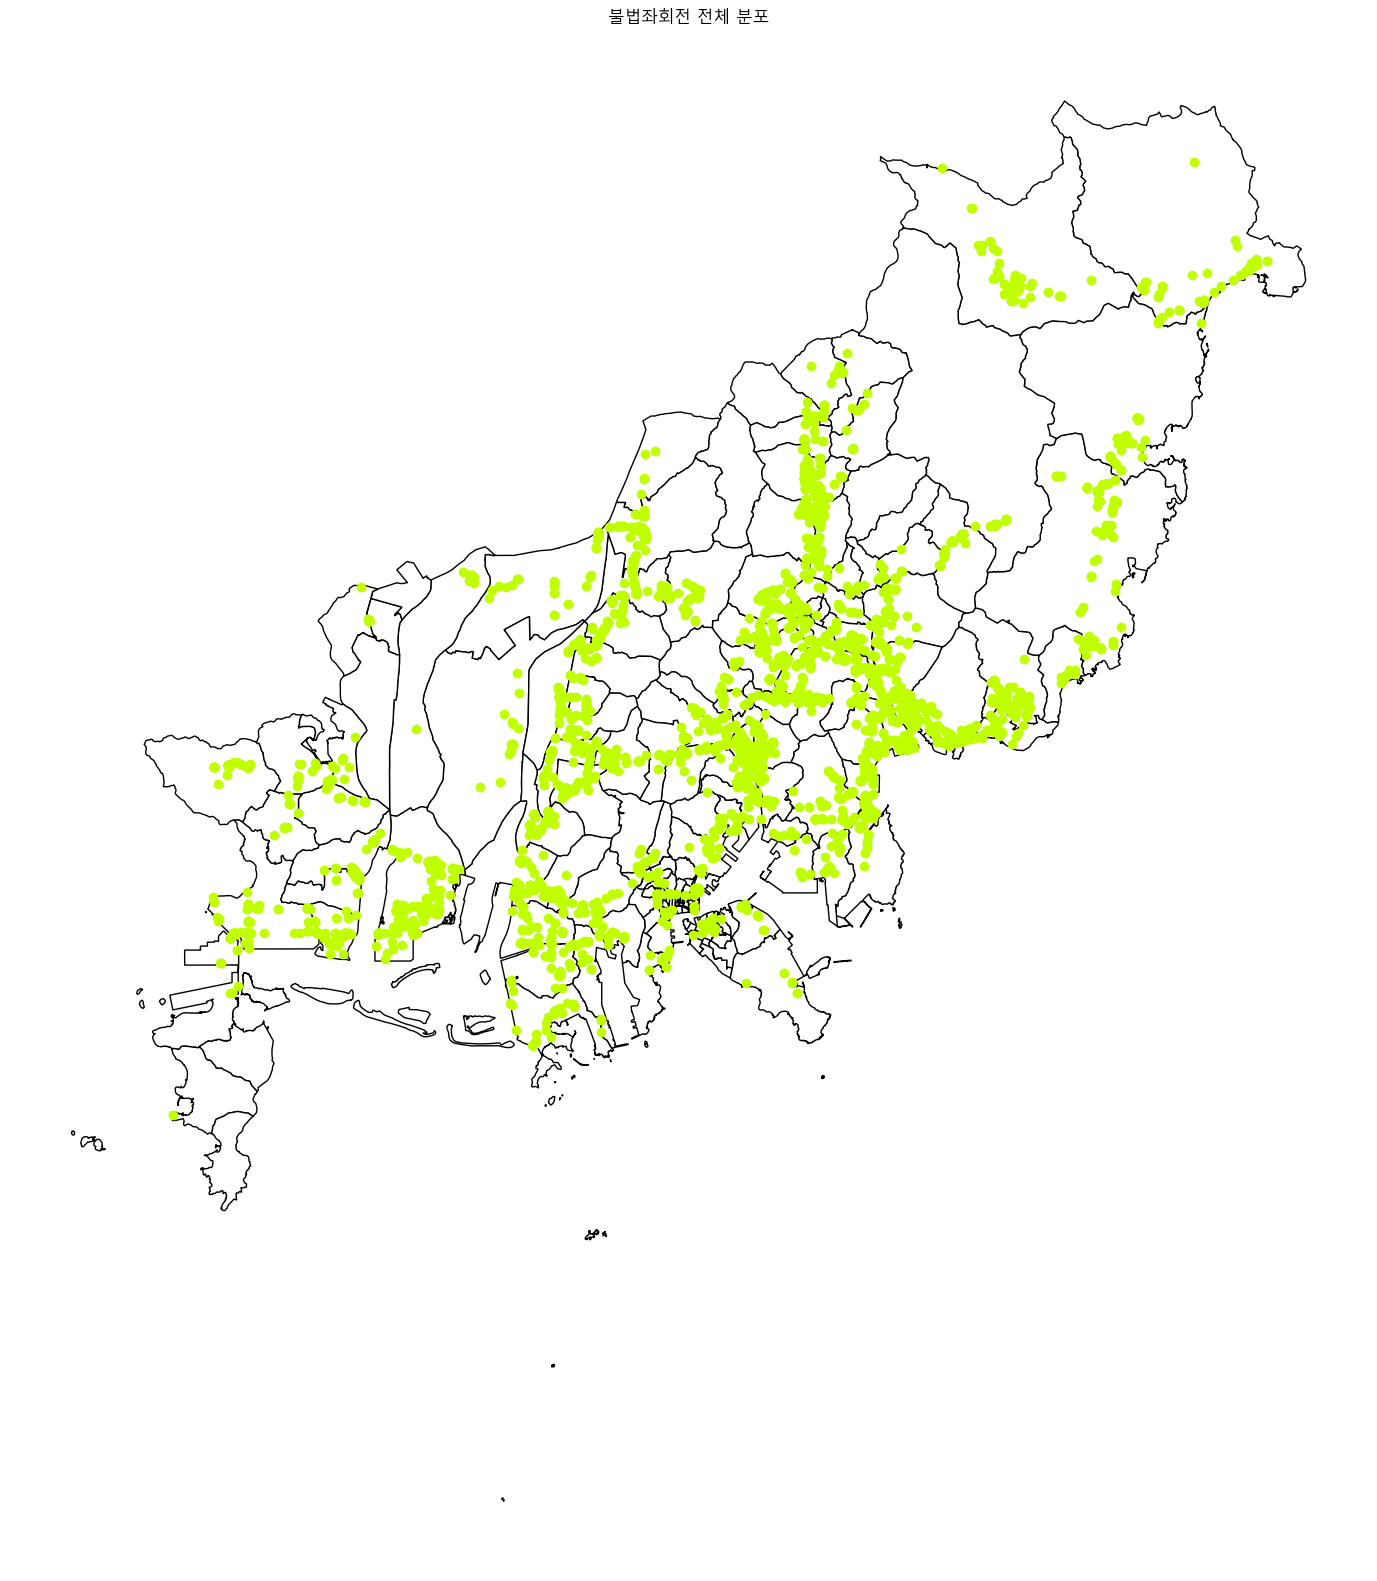

In [14]:
## 불법좌회전 표시

## scatter 만
# plt.figure(figsize=(20, 20))
# plt.scatter(left['경도'], left['위도'], color="#bfff00", marker='o')

# plt.title("불법좌회전 전체 분포")
# plt.xlabel("경도")
# plt.ylabel("위도")
# plt.axis('off')

## 지도 + scatter
base = busan.plot(figsize=(20, 20), color="w", edgecolor="k")
base.scatter(left['경도'],left['위도'],color= "#bfff00",linewidths = 1)

base.set_axis_off()
base.set_title("불법좌회전 전체 분포")

plt.show()

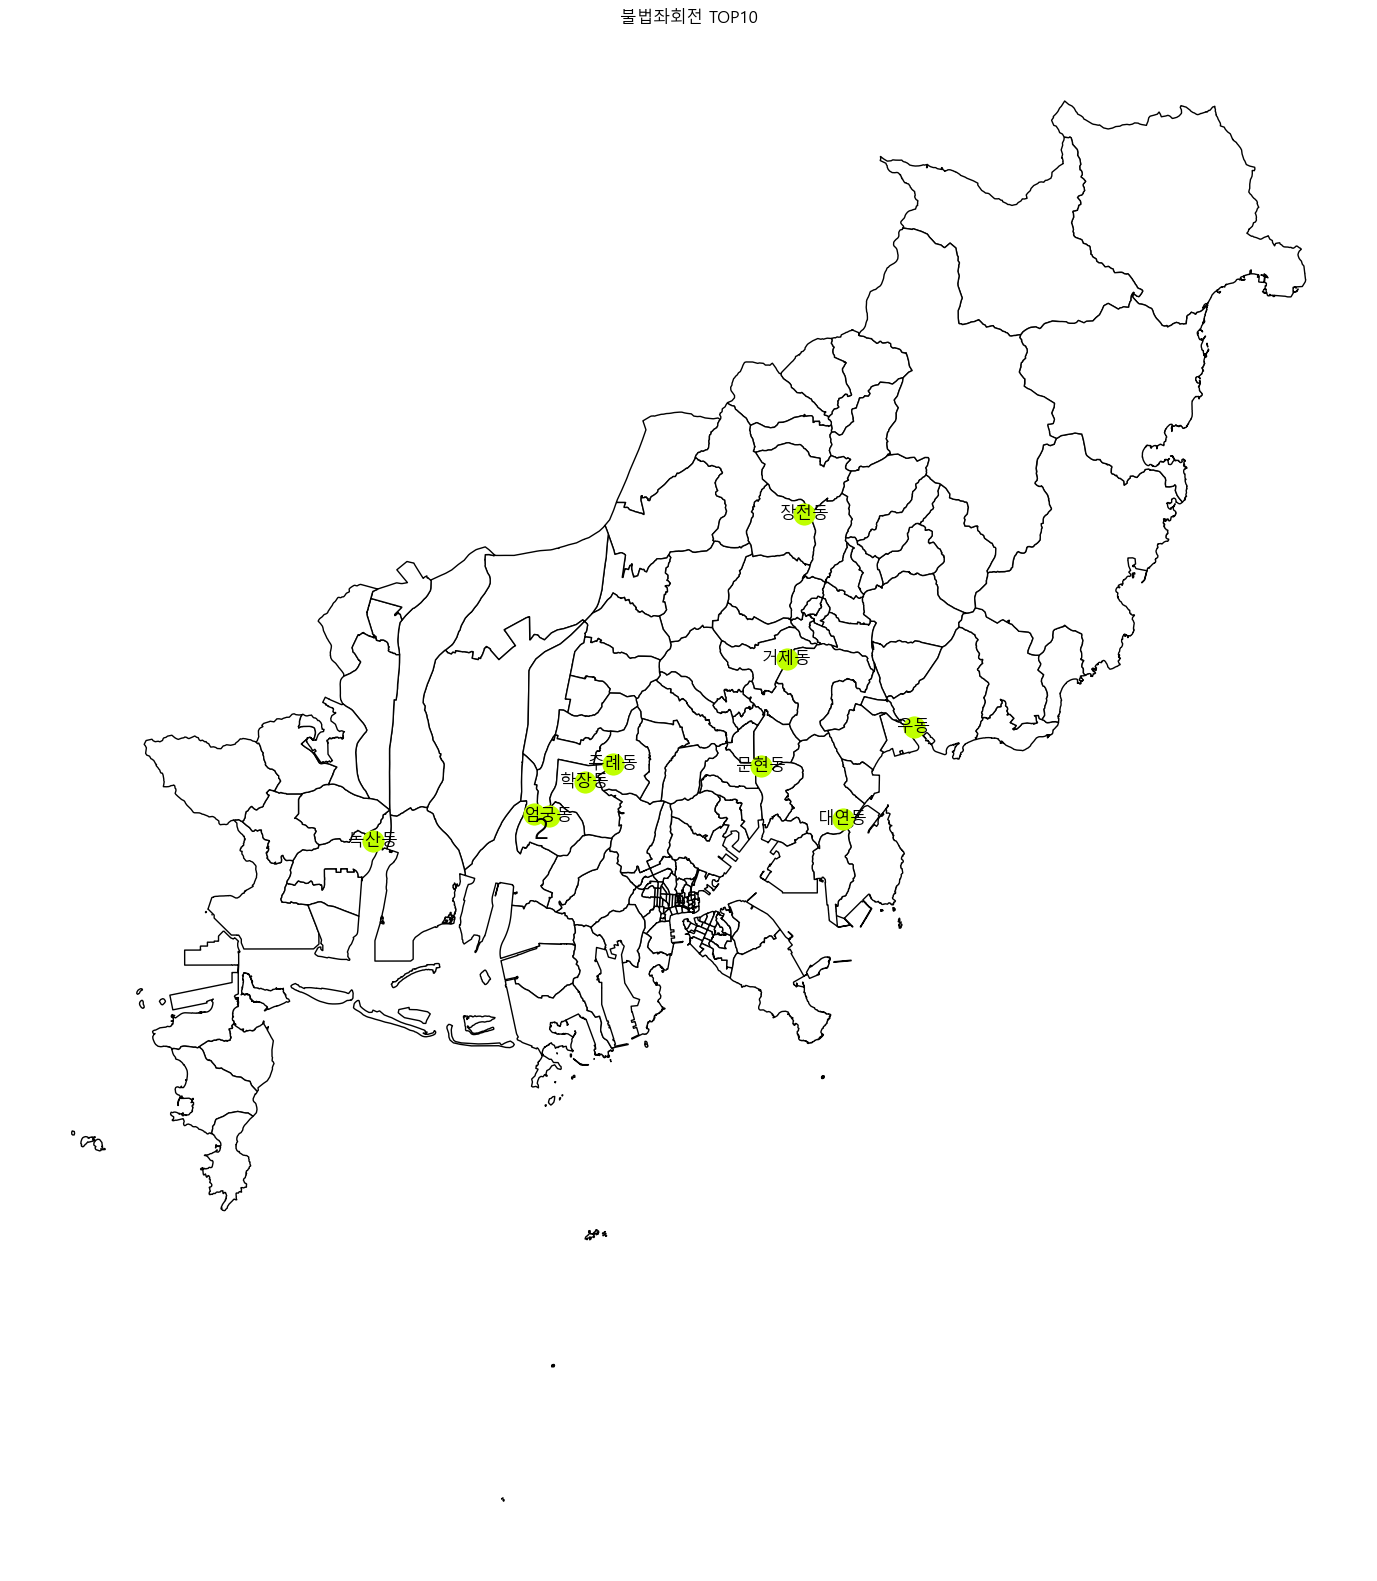

In [15]:
# 불법 좌회전 TOP10 표시 (경도, 위도 기준)
base = busan.plot(figsize=(20, 20), color="w", edgecolor="k")

box = []
for i, r in merged_data_left.iterrows():
    base.scatter(r['경도'], r['위도'],color= "#bfff00",linewidths = 10)
    if r['읍면동'] not in box:
        box.append(r['읍면동'])
        base.text(r['경도'], r['위도'], r['읍면동'], fontsize=12, ha='center', va='center')
    else:
        box.append(r['읍면동'])
### 개수 추가
for i, r in merged_data_left.iterrows():
    if box.count(r['읍면동']) >= 2:
        base.text(r['경도'], r['위도'], box.count(r['읍면동']), fontsize=20, ha='right', va='top')
        box.remove(r['읍면동'])
    else:
        pass
        
base.set_axis_off()
base.set_title("불법좌회전 TOP10")
plt.show()

## 불법유턴

In [16]:
uturn = pd.read_excel('./data/부산_신고데이터/불법유턴_busan.xlsx')
uturn = uturn[['주소','경도','위도','시군구','읍면동']]
uturn

주소          경도         위도   시군구  읍면동
0        부산광역시 해운대구 좌동 1469번길  129.174680  35.171348  해운대구   좌동
1        부산광역시 동래구 온천동 1853번길  129.069211  35.212162   동래구  온천동
2     부산광역시 기장군 일광읍 이천리 609번길  129.240392  35.272656   기장군  일광읍
3         부산광역시 수영구 수영동 547번길  129.125582  35.165538   수영구  수영동
4          부산광역시 남구 대연동 520번길  129.101073  35.133353    남구  대연동
...                       ...         ...        ...   ...  ...
1412      부산광역시 사하구 다대동 382번길  128.972929  35.051589   사하구  다대동
1413      부산광역시 수영구 남천동 558번길  129.111193  35.138822   수영구  남천동
1414      부산광역시 사상구 괘법동 574번길  128.976171  35.164452   사상구  괘법동
1415     부산광역시 연제구 연산동 2158번길  129.089683  35.174205   연제구  연산동
1416     부산광역시 사상구 모라동 1370번길  128.990568  35.184418   사상구  모라동

[1417 rows x 5 columns]

In [17]:
## 불법유턴 '읍면동' (읍/면/동) 컬럼 붙여주기
uturn['읍면동'] = uturn['주소'].str.split().str[2]
uturn

주소          경도         위도   시군구  읍면동
0        부산광역시 해운대구 좌동 1469번길  129.174680  35.171348  해운대구   좌동
1        부산광역시 동래구 온천동 1853번길  129.069211  35.212162   동래구  온천동
2     부산광역시 기장군 일광읍 이천리 609번길  129.240392  35.272656   기장군  일광읍
3         부산광역시 수영구 수영동 547번길  129.125582  35.165538   수영구  수영동
4          부산광역시 남구 대연동 520번길  129.101073  35.133353    남구  대연동
...                       ...         ...        ...   ...  ...
1412      부산광역시 사하구 다대동 382번길  128.972929  35.051589   사하구  다대동
1413      부산광역시 수영구 남천동 558번길  129.111193  35.138822   수영구  남천동
1414      부산광역시 사상구 괘법동 574번길  128.976171  35.164452   사상구  괘법동
1415     부산광역시 연제구 연산동 2158번길  129.089683  35.174205   연제구  연산동
1416     부산광역시 사상구 모라동 1370번길  128.990568  35.184418   사상구  모라동

[1417 rows x 5 columns]

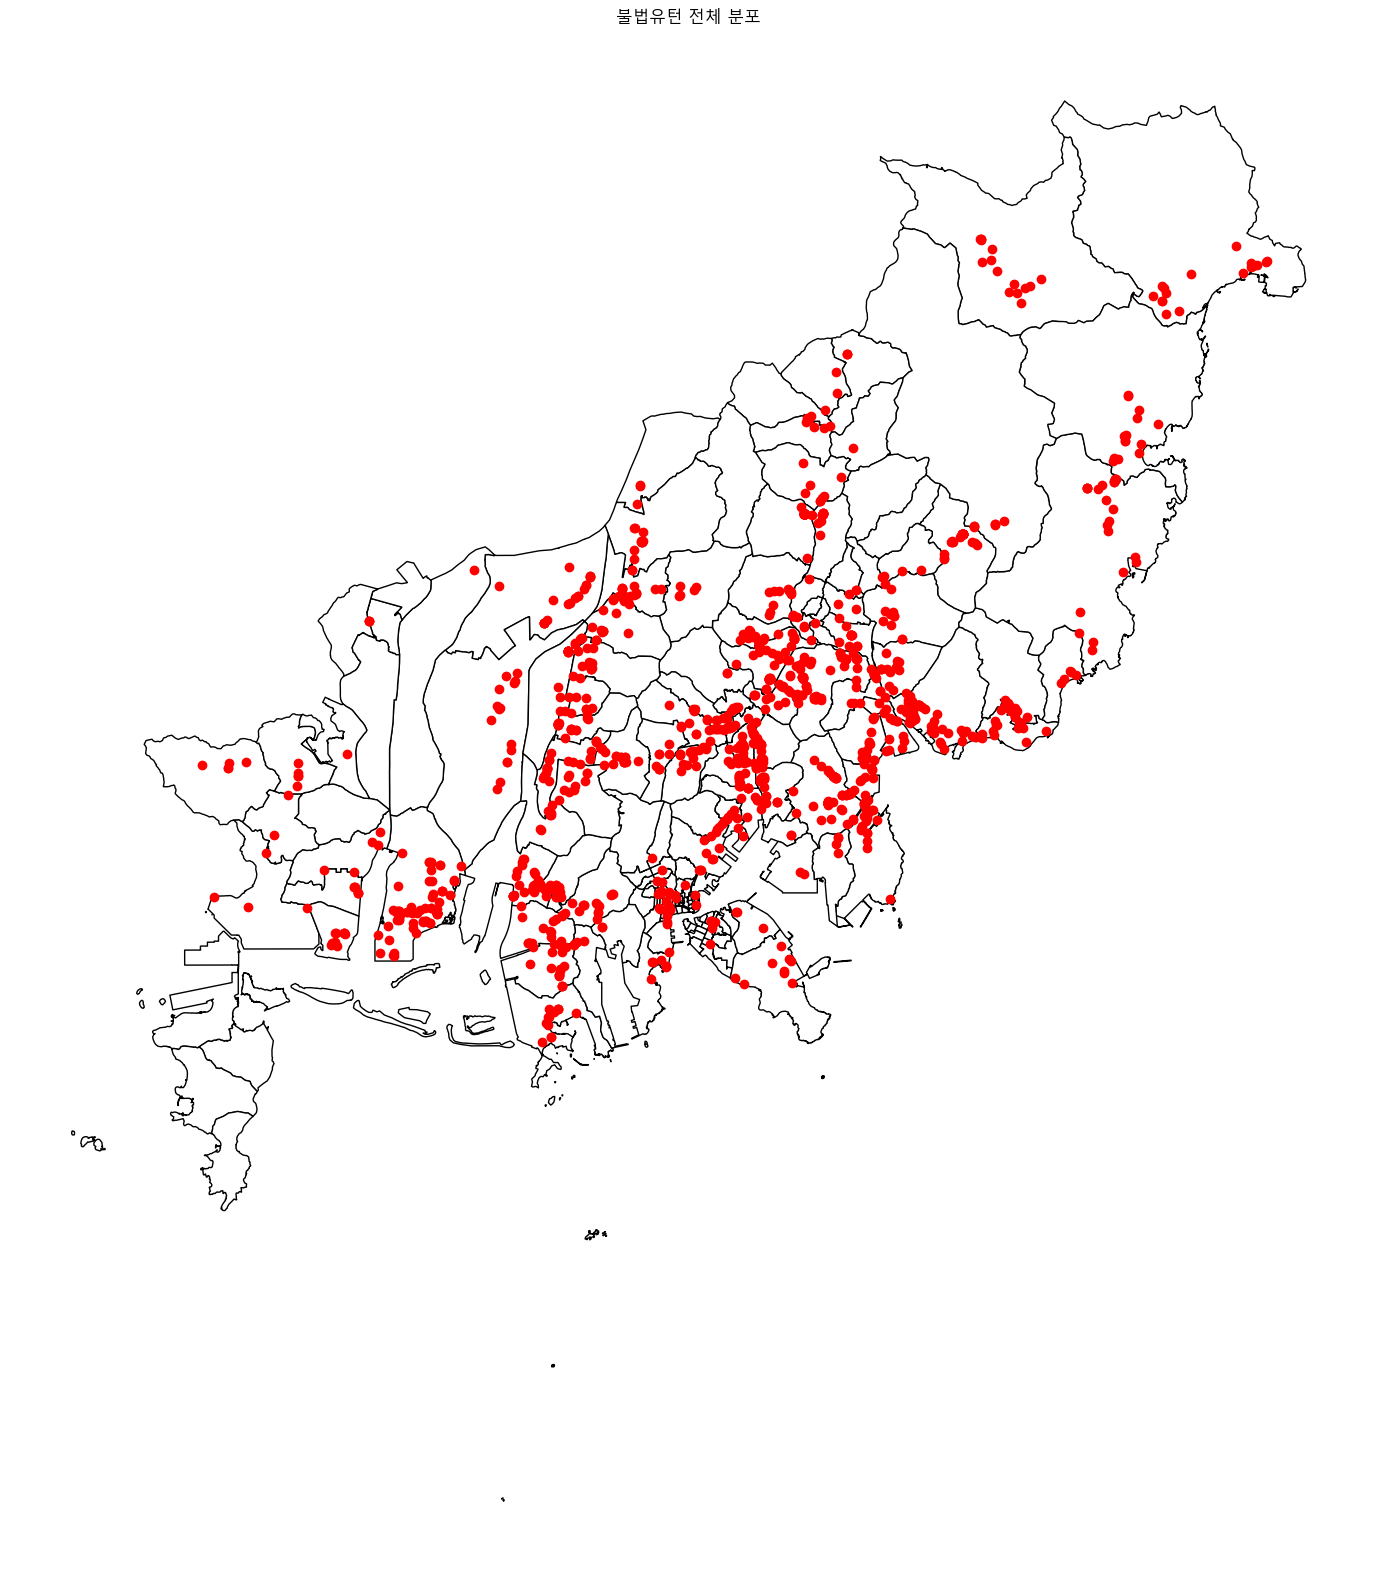

In [18]:
## 불법유턴 표시

## scatter 만
# plt.figure(figsize=(20, 20))
# plt.scatter(uturn['경도'], uturn['위도'], color="red", marker='o')

# plt.title("불법유턴 전체 분포")
# plt.xlabel("경도")
# plt.ylabel("위도")
# plt.axis('off')

## 지도 + scatter
base = busan.plot(figsize=(20, 20), color="w", edgecolor="k")
base.scatter(uturn['경도'],uturn['위도'],color= "red",linewidths = 1)
base.set_axis_off()
base.set_title("불법유턴 전체 분포")

plt.show()

In [19]:
## 불법 유턴 top 10 추출 (경도,위도 기준)
filtered_values = uturn[['경도', '위도']].value_counts().head(10).reset_index()
filtered_values.columns = ['경도', '위도', 'count']
# filtered_values

merged_data_uturn = uturn.merge(filtered_values, on=['경도', '위도'], how='inner')
merged_data_uturn.drop_duplicates(inplace=True)
merged_data_uturn['신고내용']='불법유턴'
merged_data_uturn

주소          경도         위도  시군구  읍면동  count  신고내용
0    부산광역시 사하구 장림동 506번길  128.977713  35.069894  사하구  장림동      3  불법유턴
3    부산광역시 금정구 장전동 241번길  129.084639  35.240284  금정구  장전동      2  불법유턴
5    부산광역시 금정구 장전동 241번길  129.084639  35.240275  금정구  장전동      2  불법유턴
7    부산광역시 금정구 장전동 241번길  129.084671  35.240238  금정구  장전동      2  불법유턴
9    부산광역시 금정구 장전동 241번길  129.084669  35.240184  금정구  장전동      2  불법유턴
11   부산광역시 남구 대연동 1907번길  129.095219  35.136063   남구  대연동      2  불법유턴
13   부산광역시 수영구 망미동 206번길  129.117790  35.176340  수영구  망미동      2  불법유턴
15   부산광역시 남구 대연동 1903번길  129.094960  35.136468   남구  대연동      2  불법유턴
17   부산광역시 사하구 당리동 315번길  128.973233  35.104932  사하구  당리동      2  불법유턴
19  부산광역시 금정구 두구동 1321번길  129.103286  35.297787  금정구  두구동      2  불법유턴

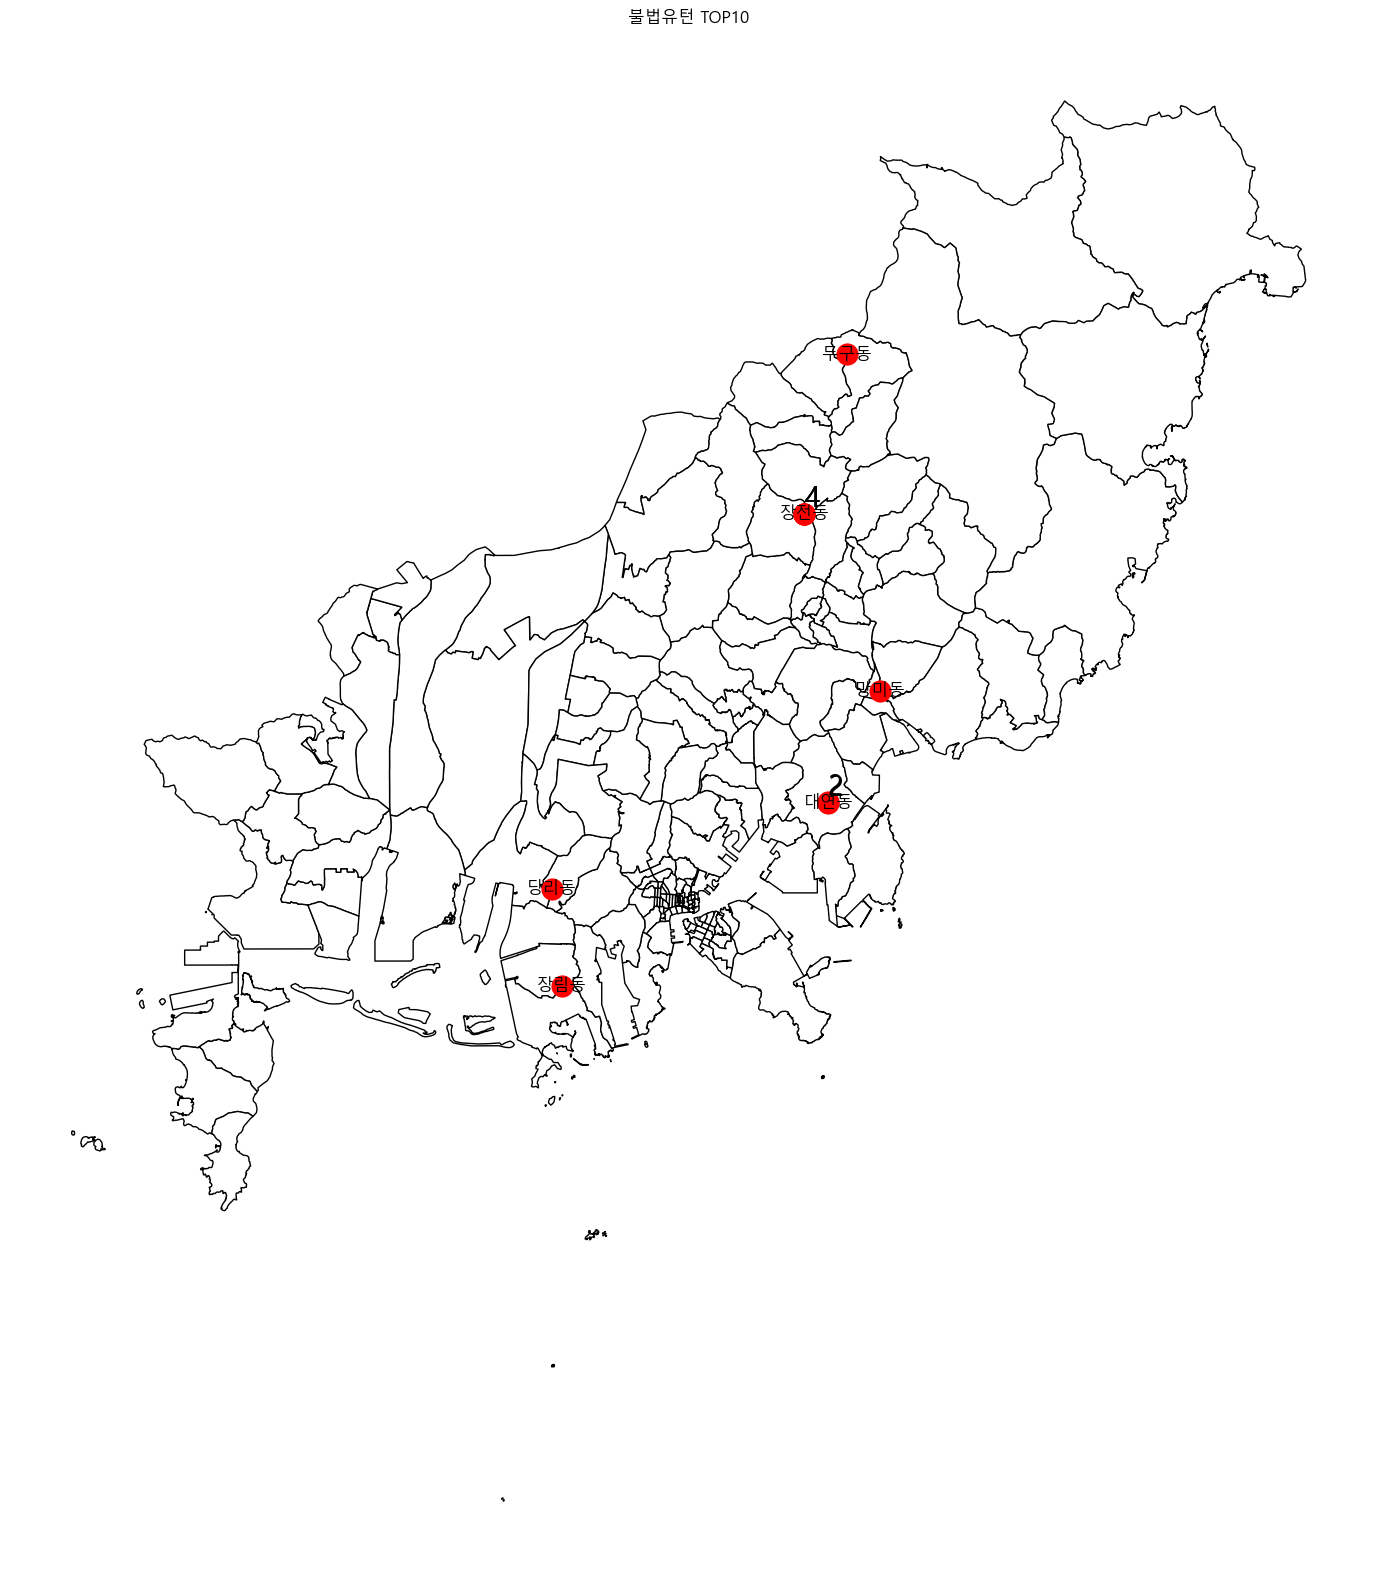

In [20]:
# 불법 유턴 TOP10 동 표시 (경도, 위도 기준)
base = busan.plot(figsize=(20, 20), color="w", edgecolor="k")

box = []
### top10 위치, 읍/면/동 표시
for i, r in merged_data_uturn.iterrows():
    base.scatter(r['경도'], r['위도'],color= "red",linewidths = 10)
    if r['읍면동'] not in box:
        box.append(r['읍면동'])
        base.text(r['경도'], r['위도'], r['읍면동'], fontsize=12, ha='center', va='center')
    else:
        box.append(r['읍면동'])

### 개수 추가
for i, r in merged_data_uturn.iterrows():
    if box.count(r['읍면동']) >= 2:
        base.text(r['경도'], r['위도'], box.count(r['읍면동']), fontsize=20, ha='left', va='bottom')
        # box.remove(r['읍면동'])
    else:
        pass
        
base.set_axis_off()
base.set_title("불법유턴 TOP10")
plt.show()

## 신호위반

In [21]:
signal_violation = pd.read_excel('./data/부산_신고데이터/신호위반_busan.xlsx')
signal_violation = signal_violation[['주소','경도','위도','시군구','읍면동']]
signal_violation

주소          경도         위도   시군구  읍면동
0      부산광역시 해운대구 중동  1783번길  129.164338  35.166324  해운대구   중동
1      부산광역시 부산진구 전포동  336번길  129.068387  35.154525  부산진구  전포동
2       부산광역시 수영구 수영동  547번길  129.125442  35.165578   수영구  수영동
3      부산광역시 동래구 안락동  1081번길  129.113967  35.184456   동래구  안락동
4     부산광역시 기장군 일광읍 삼성리 80번길  129.224172  35.256037   기장군  일광읍
...                      ...         ...        ...   ...  ...
5751    부산광역시 수영구 광안동  205번길  129.120869  35.158783   수영구  광안동
5752   부산광역시 강서구 명지동  3346번길  128.923553  35.102974   강서구  명지동
5753    부산광역시 금정구 구서동  262번길  129.091834  35.248780   금정구  구서동
5754   부산광역시 사상구 모라동  1370번길  128.990568  35.184418   사상구  모라동
5755    부산광역시 사상구 감전동  178번길  128.974795  35.159728   사상구  감전동

[5756 rows x 5 columns]

In [22]:
## 불법유턴 '읍면동' (읍/면/동) 컬럼 붙여주기
signal_violation['읍면동'] = signal_violation['주소'].str.split().str[2]
signal_violation

주소          경도         위도   시군구  읍면동
0      부산광역시 해운대구 중동  1783번길  129.164338  35.166324  해운대구   중동
1      부산광역시 부산진구 전포동  336번길  129.068387  35.154525  부산진구  전포동
2       부산광역시 수영구 수영동  547번길  129.125442  35.165578   수영구  수영동
3      부산광역시 동래구 안락동  1081번길  129.113967  35.184456   동래구  안락동
4     부산광역시 기장군 일광읍 삼성리 80번길  129.224172  35.256037   기장군  일광읍
...                      ...         ...        ...   ...  ...
5751    부산광역시 수영구 광안동  205번길  129.120869  35.158783   수영구  광안동
5752   부산광역시 강서구 명지동  3346번길  128.923553  35.102974   강서구  명지동
5753    부산광역시 금정구 구서동  262번길  129.091834  35.248780   금정구  구서동
5754   부산광역시 사상구 모라동  1370번길  128.990568  35.184418   사상구  모라동
5755    부산광역시 사상구 감전동  178번길  128.974795  35.159728   사상구  감전동

[5756 rows x 5 columns]

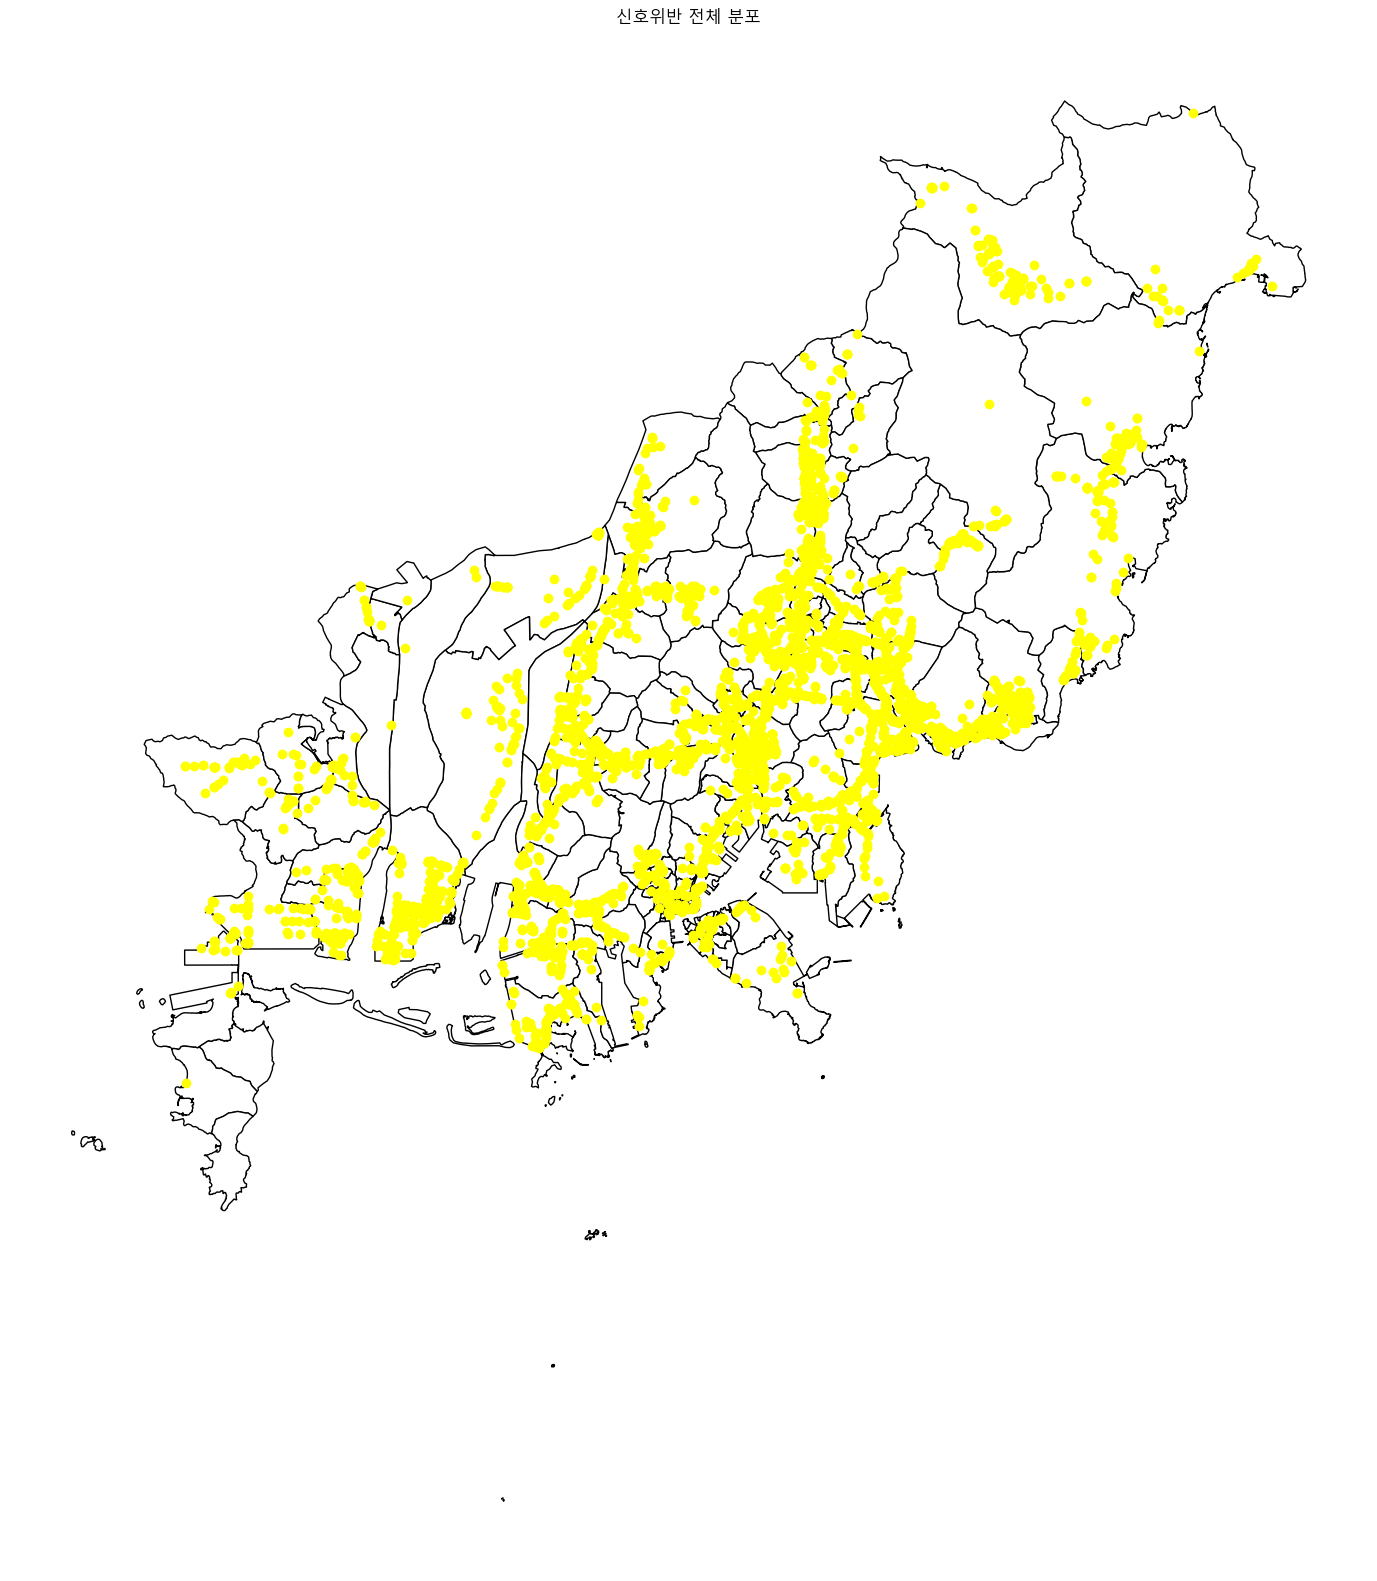

In [23]:
## 신호위반 표시

## scatter 만
# plt.figure(figsize=(20, 20))
# plt.scatter(signal_violation['경도'], signal_violation['위도'], color="purple", marker='o')

# plt.title("신호위반 전체 분포")
# plt.xlabel("경도")
# plt.ylabel("위도")
# plt.axis('off')

## 지도 + scatter
base = busan.plot(figsize=(20, 20), color="w", edgecolor="k")
base.scatter(signal_violation['경도'],signal_violation['위도'],color= "yellow",linewidths = 1)
base.set_axis_off()
base.set_title("신호위반 전체 분포")

plt.show()

In [24]:
## 신호위반 top 10 추출 (경도,위도 기준)
filtered_values = signal_violation[['경도', '위도']].value_counts().head(10).reset_index()
filtered_values.columns = ['경도', '위도', 'count']
# filtered_values

merged_data_signal_violation = signal_violation.merge(filtered_values, on=['경도', '위도'], how='inner')
merged_data_signal_violation.drop_duplicates(inplace=True)
merged_data_signal_violation['신고내용'] = '신호위반'
merged_data_signal_violation

주소          경도         위도   시군구  읍면동  count  신고내용
0      부산광역시 사하구 구평동  106번길  128.986368  35.085978   사하구  구평동      4  신호위반
4       부산광역시 남구 대연동  599번길  129.103386  35.130514    남구  대연동      2  신호위반
6       부산광역시 사상구 엄궁동  10번길  128.972046  35.131170   사상구  엄궁동      8  신호위반
14  부산광역시 기장군 철마면 고촌리 693번길  129.168568  35.236181   기장군  철마면      2  신호위반
16    부산광역시 강서구 명지동  3400번길  128.916694  35.096423   강서구  명지동      7  신호위반
23      부산광역시 금정구 남산동  13번길  129.092712  35.268169   금정구  남산동      2  신호위반
25     부산광역시 사상구 학장동  731번길  128.978763  35.141219   사상구  학장동      3  신호위반
28     부산광역시 강서구 명지동  401번길  128.919031  35.114767   강서구  명지동      2  신호위반
30     부산광역시 사하구 당리동  315번길  128.973233  35.104932   사하구  당리동      2  신호위반
32    부산광역시 부산진구 부암동  315번길  129.048593  35.167475  부산진구  부암동      5  신호위반

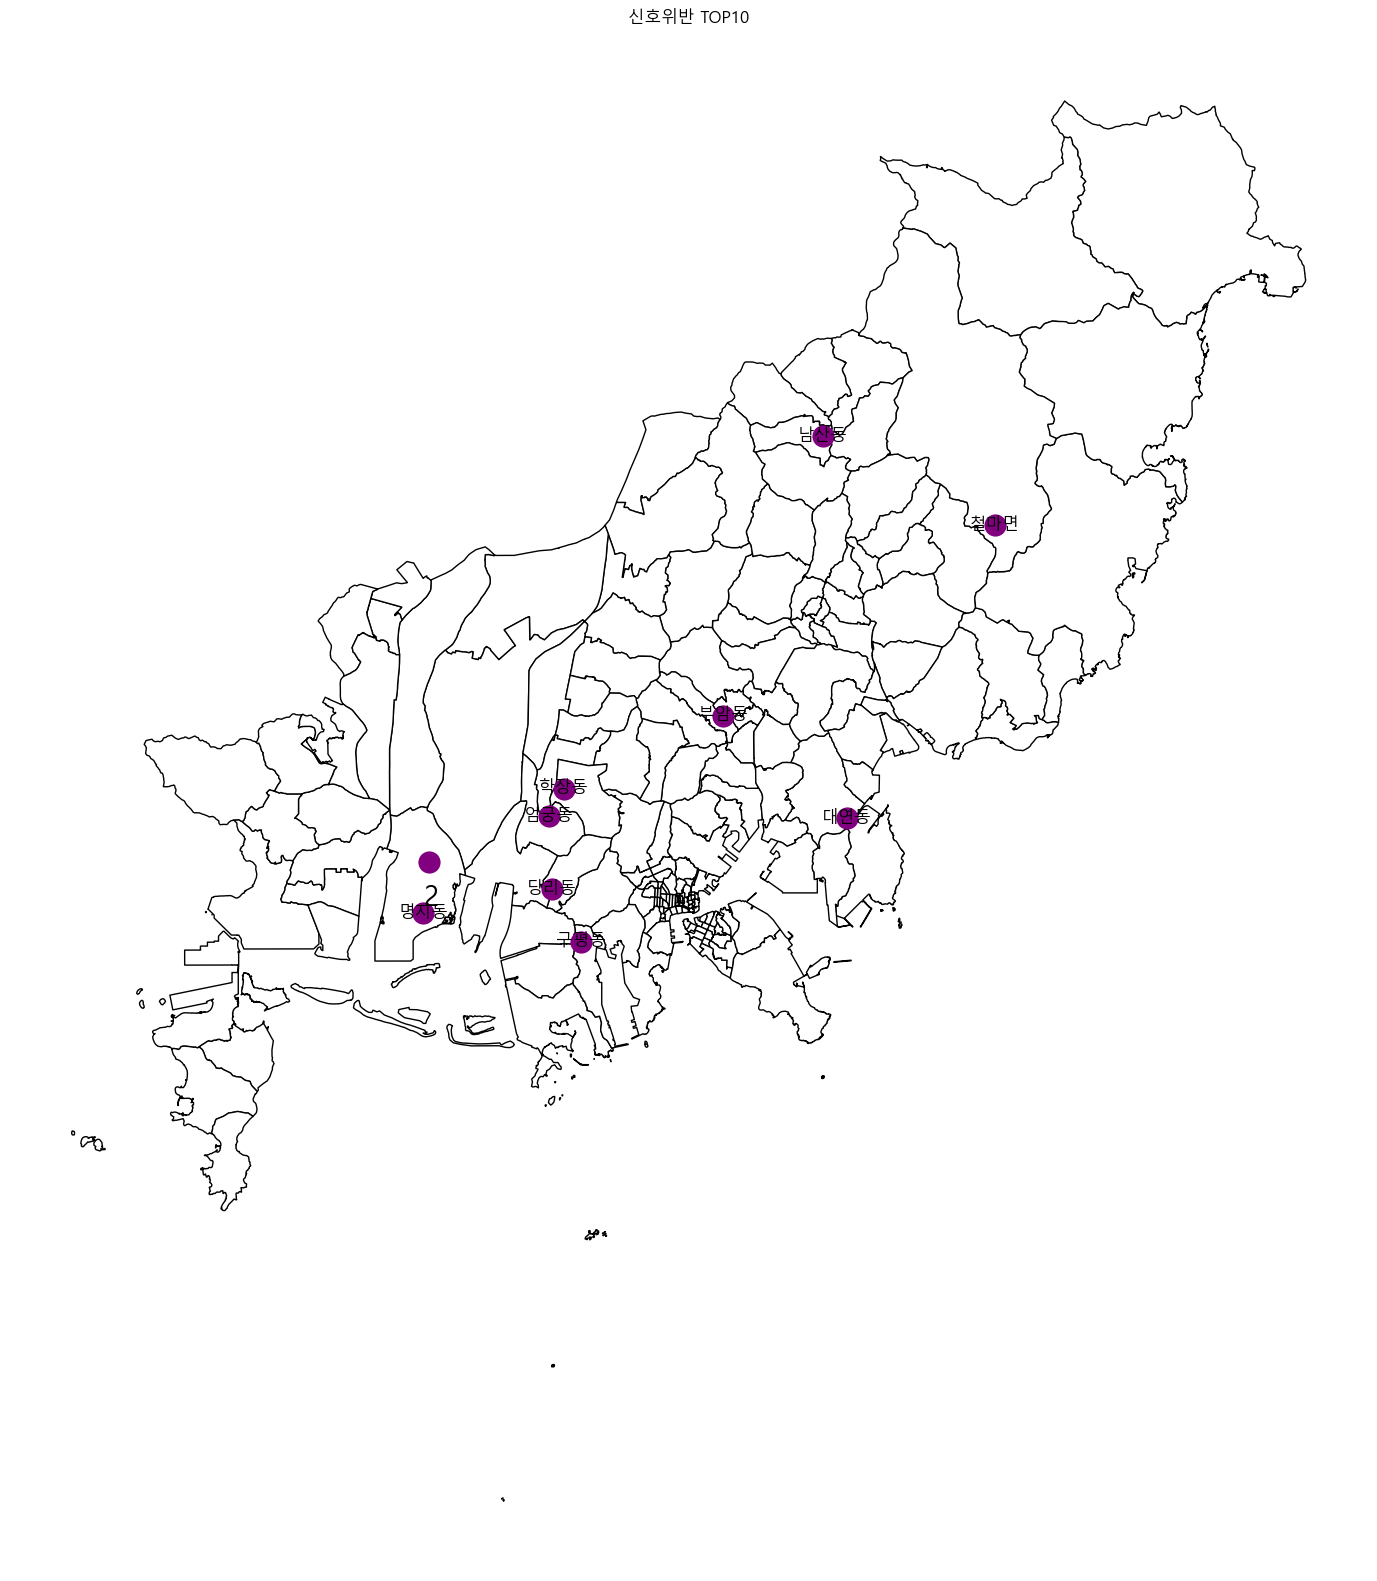

In [25]:
# 신호위반 TOP10 동 표시 (경도, 위도 기준)
base = busan.plot(figsize=(20, 20), color="w", edgecolor="k")

box = []
### top10 위치, 읍/면/동 표시
for i, r in merged_data_signal_violation.iterrows():
    base.scatter(r['경도'], r['위도'],color= "purple",linewidths = 10)
    if r['읍면동'] not in box:
        box.append(r['읍면동'])
        base.text(r['경도'], r['위도'], r['읍면동'], fontsize=12, ha='center', va='center')
    else:
        box.append(r['읍면동'])

### 개수 추가
for i, r in merged_data_signal_violation.iterrows():
    if box.count(r['읍면동']) >= 2:
        base.text(r['경도'], r['위도'], box.count(r['읍면동']), fontsize=20, ha='left', va='bottom')
        box.remove(r['읍면동'])
    else:
        pass
        
base.set_axis_off()
base.set_title("신호위반 TOP10")
plt.show()

## 진로변경방법위반

In [26]:
course_violation = pd.read_excel('./data/부산_신고데이터/진로변경방법위반_busan.xlsx')
course_violation = course_violation[['주소','경도','위도','시군구','읍면동']]
course_violation

주소          경도         위도   시군구  읍면동
0     부산광역시 부산진구 범천동 943번길  129.058649  35.150239  부산진구  범천동
1       부산광역시 연제구 거제동 72번길  129.080089  35.195890   연제구  거제동
2     부산광역시 해운대구 송정동 451번길  129.201086  35.183910  해운대구  송정동
3       부산광역시 연제구 거제동 72번길  129.080049  35.196015   연제구  거제동
4     부산광역시 연제구 연산동 1530번길  129.087269  35.185579   연제구  연산동
...                    ...         ...        ...   ...  ...
6101    부산광역시 동구 좌천동 362번길  129.056099  35.136057    동구  좌천동
6102   부산광역시 동래구 사직동 161번길  129.070428  35.200899   동래구  사직동
6103  부산광역시 해운대구 반여동 158번길  129.118027  35.193340  해운대구  반여동
6104   부산광역시 강서구 봉림동 738번길  128.895433  35.165605   강서구  봉림동
6105   부산광역시 사하구 감천동 729번길  128.999676  35.089699   사하구  감천동

[6106 rows x 5 columns]

In [27]:
## 진로변경방법위반 '읍면동' (읍/면/동) 컬럼 붙여주기
course_violation['읍면동'] = course_violation['주소'].str.split().str[2]
course_violation

주소          경도         위도   시군구  읍면동
0     부산광역시 부산진구 범천동 943번길  129.058649  35.150239  부산진구  범천동
1       부산광역시 연제구 거제동 72번길  129.080089  35.195890   연제구  거제동
2     부산광역시 해운대구 송정동 451번길  129.201086  35.183910  해운대구  송정동
3       부산광역시 연제구 거제동 72번길  129.080049  35.196015   연제구  거제동
4     부산광역시 연제구 연산동 1530번길  129.087269  35.185579   연제구  연산동
...                    ...         ...        ...   ...  ...
6101    부산광역시 동구 좌천동 362번길  129.056099  35.136057    동구  좌천동
6102   부산광역시 동래구 사직동 161번길  129.070428  35.200899   동래구  사직동
6103  부산광역시 해운대구 반여동 158번길  129.118027  35.193340  해운대구  반여동
6104   부산광역시 강서구 봉림동 738번길  128.895433  35.165605   강서구  봉림동
6105   부산광역시 사하구 감천동 729번길  128.999676  35.089699   사하구  감천동

[6106 rows x 5 columns]

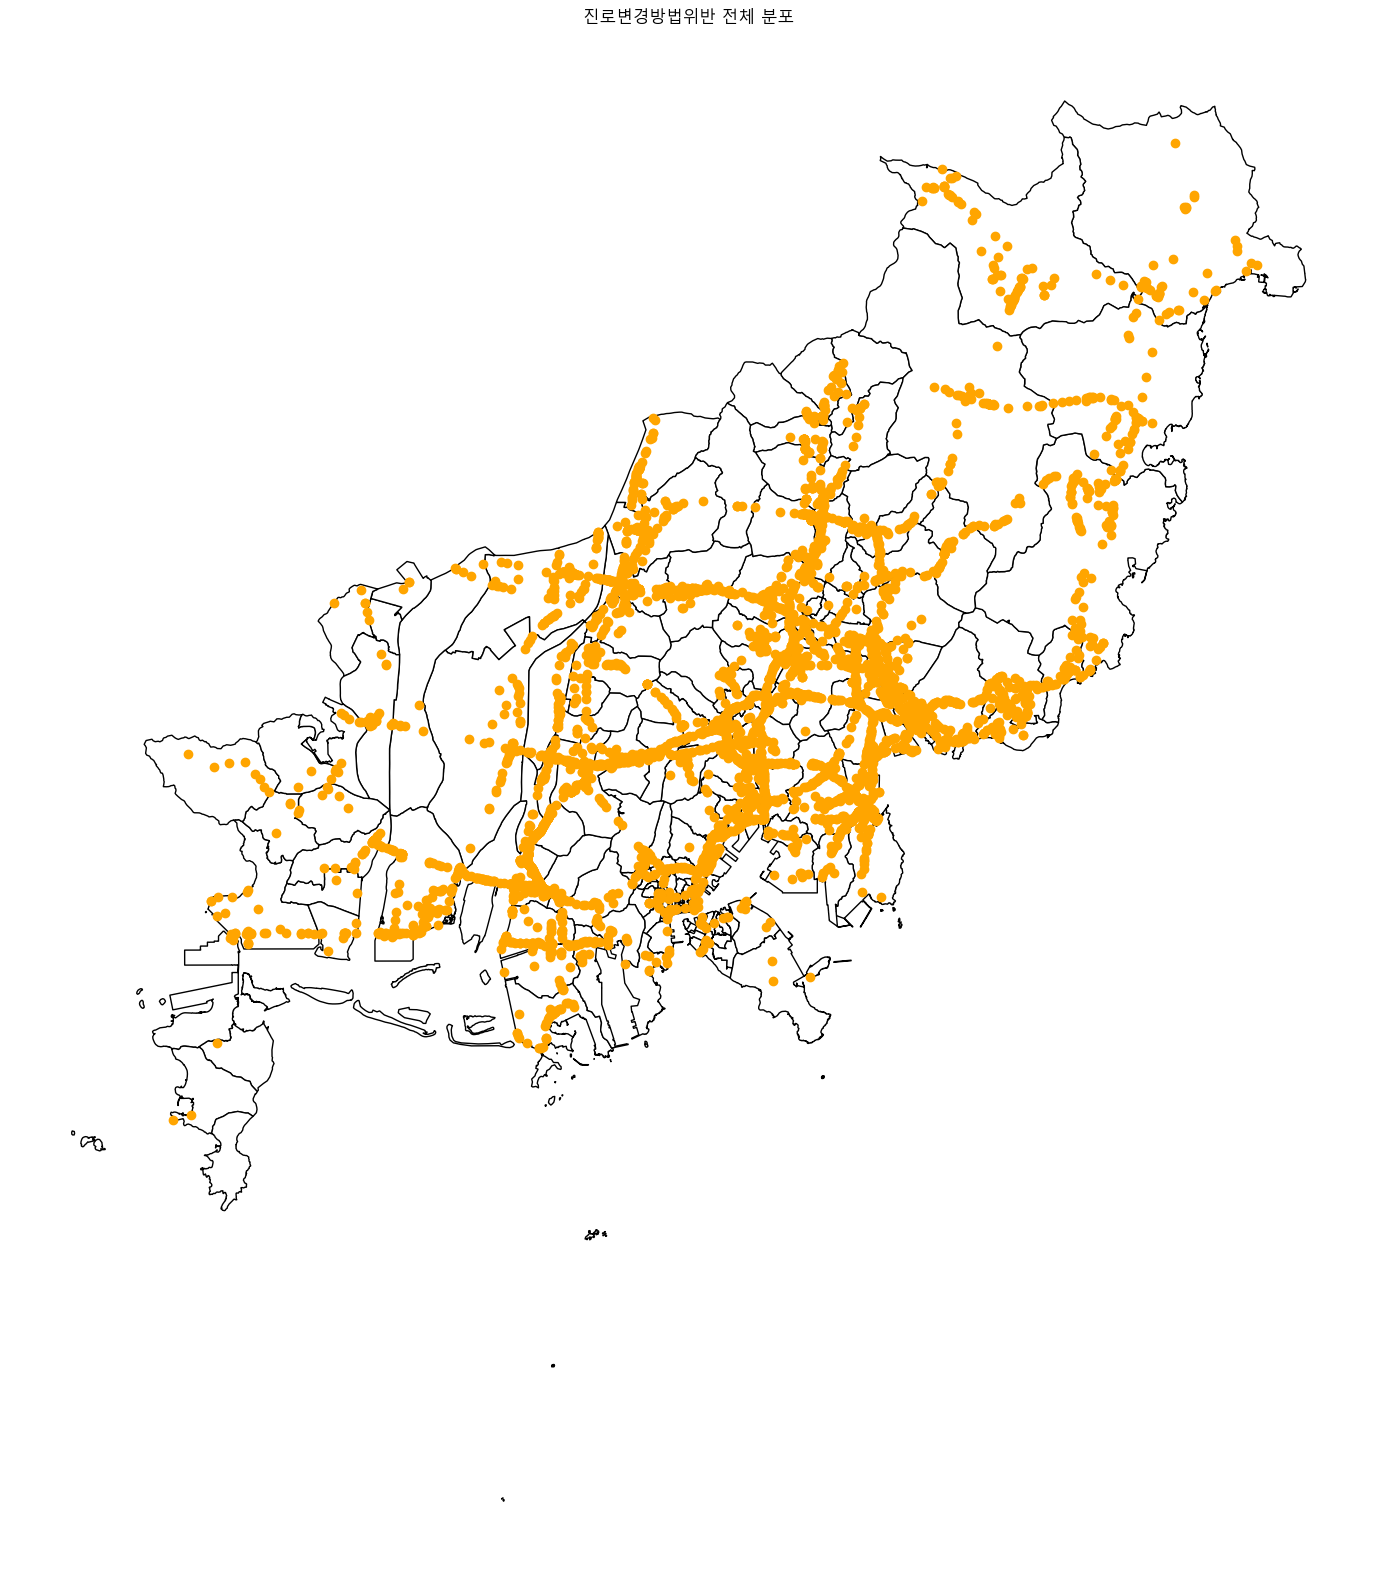

In [28]:
## 진로변경방법위반 표시

## scatter 만
# plt.figure(figsize=(20, 20))
# plt.scatter(course_violation['경도'], course_violation['위도'], color="orange", marker='o')

# plt.title("진로변경방법위반 전체 분포")
# plt.xlabel("경도")
# plt.ylabel("위도")
# plt.axis('off')

## 지도 + scatter
base = busan.plot(figsize=(20, 20), color="w", edgecolor="k")
base.scatter(course_violation['경도'],course_violation['위도'],color= "orange",linewidths = 1)

base.set_axis_off()
base.set_title("진로변경방법위반 전체 분포")
plt.show()

In [29]:
## 진로변경방법위반 top 10 추출 (경도,위도 기준)

filtered_values = course_violation[['경도','위도']].value_counts().head(10).reset_index()
filtered_values.columns = ['경도','위도','count']

merged_data_course_violation = course_violation.merge(filtered_values, on=['경도','위도'], how='inner')
merged_data_course_violation.drop_duplicates(inplace=True)
merged_data_course_violation['신고내용'] = '진로변경방법위반'
merged_data_course_violation

주소          경도         위도   시군구  읍면동  count      신고내용
0     부산광역시 해운대구 우동 1427번길  129.132796  35.163426  해운대구   우동      5  진로변경방법위반
5     부산광역시 해운대구 재송동 774번길  129.120329  35.179260  해운대구  재송동     11  진로변경방법위반
16      부산광역시 금정구 부곡동 13번길  129.102150  35.237419   금정구  부곡동     11  진로변경방법위반
27      부산광역시 북구 만덕동 597번길  129.036443  35.212882    북구  만덕동      3  진로변경방법위반
30      부산광역시 사상구 엄궁동 10번길  128.972046  35.131170   사상구  엄궁동      5  진로변경방법위반
35      부산광역시 사상구 모라동 14번길  129.015139  35.178875   사상구  모라동      8  진로변경방법위반
43    부산광역시 부산진구 전포동 889번길  129.063578  35.150387  부산진구  전포동      3  진로변경방법위반
46     부산광역시 사상구 감전동 873번길  128.971691  35.152635   사상구  감전동      4  진로변경방법위반
50  부산광역시 기장군 철마면 연구리 15번길  129.166177  35.279894   기장군  철마면      6  진로변경방법위반
56       부산광역시 강서구 녹산동 5번길  128.894439  35.122138   강서구  녹산동      4  진로변경방법위반

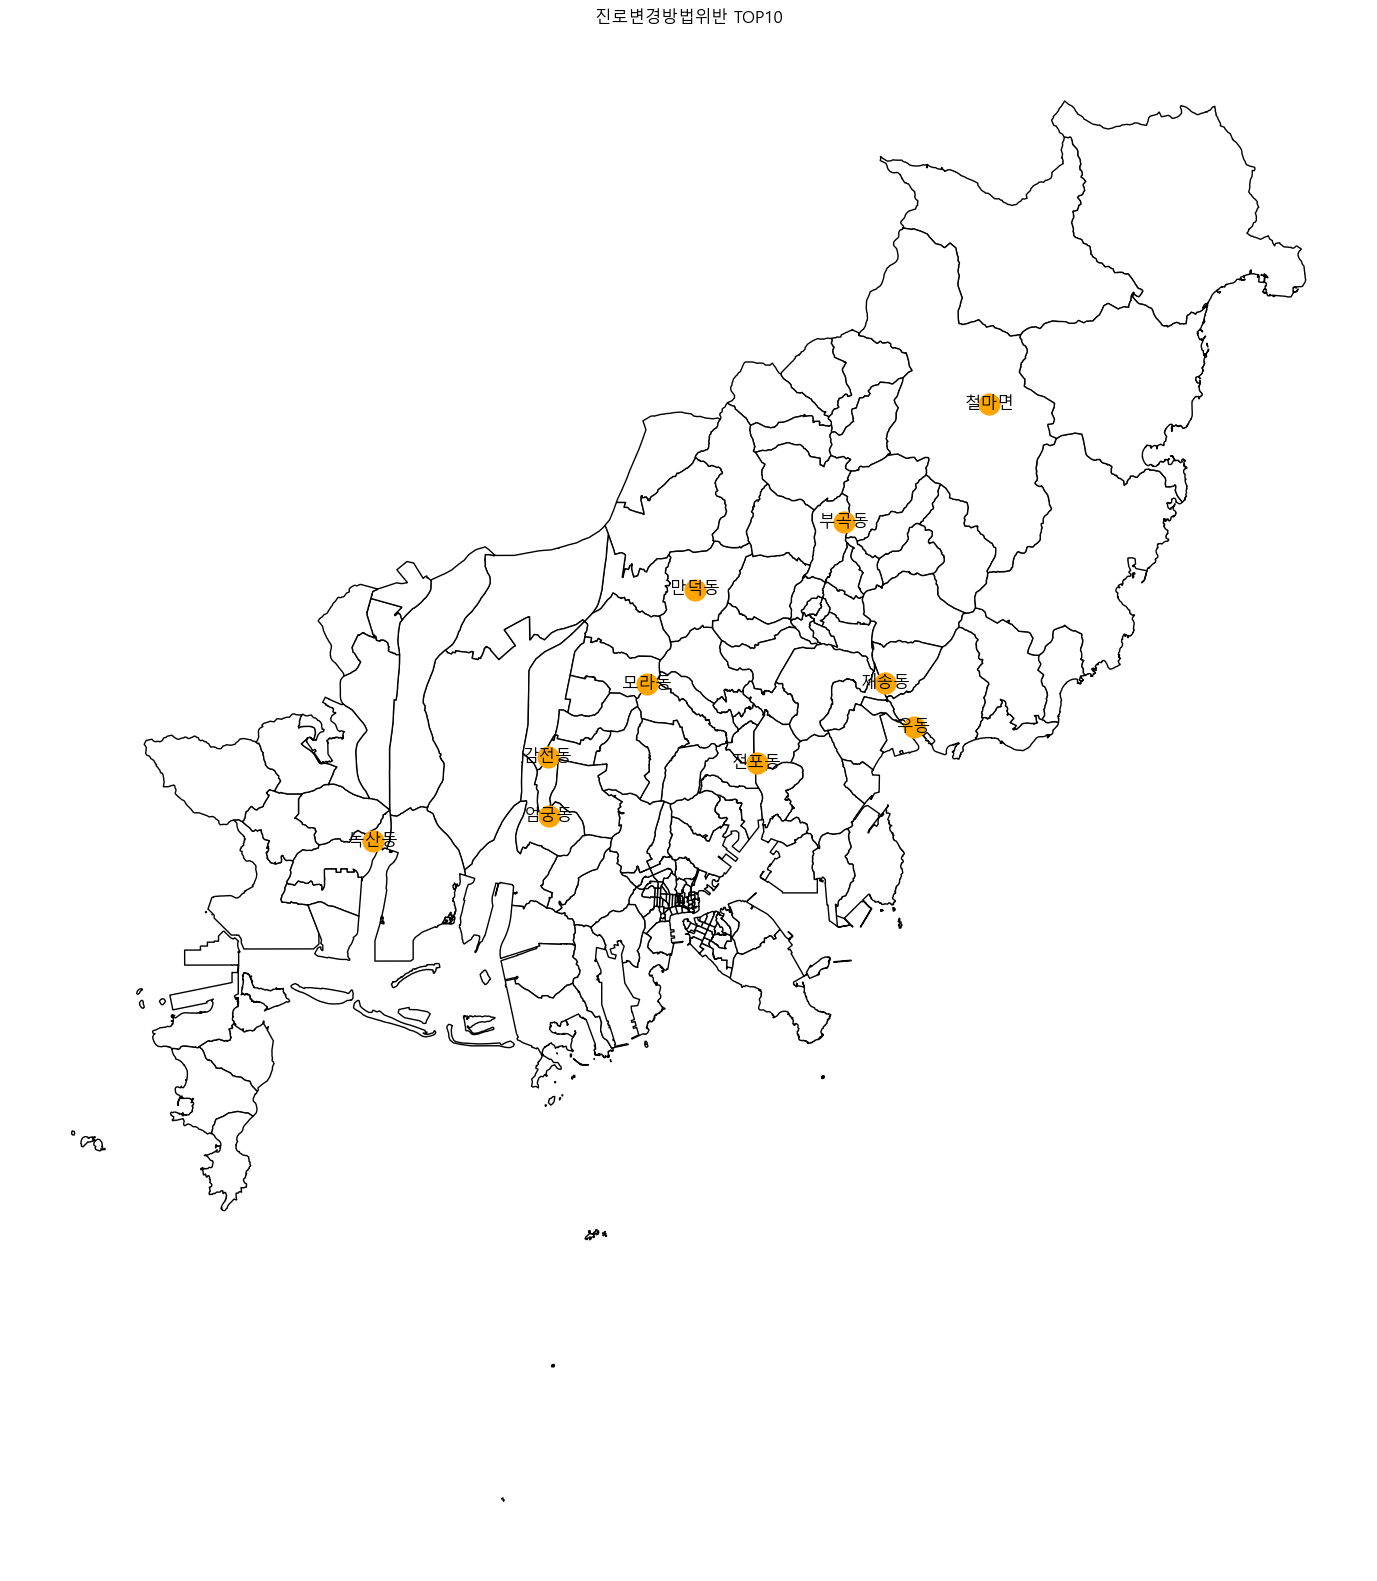

In [30]:
# 진로변경방법 TOP10 동 표시 (경도, 위도 기준)
base = busan.plot(figsize=(20, 20), color="w", edgecolor="k")

box = []
### top10 위치, 읍/면/동 표시
for i, r in merged_data_course_violation.iterrows():
    base.scatter(r['경도'], r['위도'],color= "orange",linewidths = 10)
    if r['읍면동'] not in box:
        box.append(r['읍면동'])
        base.text(r['경도'], r['위도'], r['읍면동'], fontsize=12, ha='center', va='center')
    else:
        box.append(r['읍면동'])

### 개수 추가
for i, r in merged_data_course_violation.iterrows():
    if box.count(r['읍면동']) >= 2:
        base.text(r['경도'], r['위도'], box.count(r['읍면동']), fontsize=20, ha='left', va='bottom')
        box.remove(r['읍면동'])
    else:
        pass
        
base.set_axis_off()
base.set_title("진로변경방법위반 TOP10")
plt.show()

## 중앙선침범

In [31]:
center = pd.read_excel('./data/부산_신고데이터/중앙선침범_busan.xlsx')
center = center[['주소','경도','위도','시군구','읍면동']]
center

주소          경도         위도   시군구    읍면동
0       부산광역시 부산진구 양정동  322번길  129.072358  35.176558  부산진구    양정동
1          부산광역시 동래구 수안동  7번길  129.080118  35.200224   동래구    수안동
2       부산광역시 금정구 구서동  1040번길  129.084442  35.256598   금정구    구서동
3     부산광역시 기장군 일광읍 이천리 609번길  129.240392  35.272656   기장군    일광읍
4        부산광역시 북구 화명동  1718번길  129.008278  35.240102    북구    화명동
...                       ...         ...        ...   ...    ...
1887   부산광역시 영도구 남항동1가  232번길  129.037629  35.091544   영도구  남항동1가
1888     부산광역시 동래구 안락동  125번길  129.097886  35.192586   동래구    안락동
1889       부산광역시 사하구 신평동  7번길  128.973742  35.093391   사하구    신평동
1890   부산광역시 영도구 남항동1가  232번길  129.039337  35.089226   영도구  남항동1가
1891    부산광역시 부산진구 부암동  519번길  129.036210  35.170165  부산진구    부암동

[1892 rows x 5 columns]

In [32]:
center['읍면동'] = center['주소'].str.split().str[2]
center

주소          경도         위도   시군구    읍면동
0       부산광역시 부산진구 양정동  322번길  129.072358  35.176558  부산진구    양정동
1          부산광역시 동래구 수안동  7번길  129.080118  35.200224   동래구    수안동
2       부산광역시 금정구 구서동  1040번길  129.084442  35.256598   금정구    구서동
3     부산광역시 기장군 일광읍 이천리 609번길  129.240392  35.272656   기장군    일광읍
4        부산광역시 북구 화명동  1718번길  129.008278  35.240102    북구    화명동
...                       ...         ...        ...   ...    ...
1887   부산광역시 영도구 남항동1가  232번길  129.037629  35.091544   영도구  남항동1가
1888     부산광역시 동래구 안락동  125번길  129.097886  35.192586   동래구    안락동
1889       부산광역시 사하구 신평동  7번길  128.973742  35.093391   사하구    신평동
1890   부산광역시 영도구 남항동1가  232번길  129.039337  35.089226   영도구  남항동1가
1891    부산광역시 부산진구 부암동  519번길  129.036210  35.170165  부산진구    부암동

[1892 rows x 5 columns]

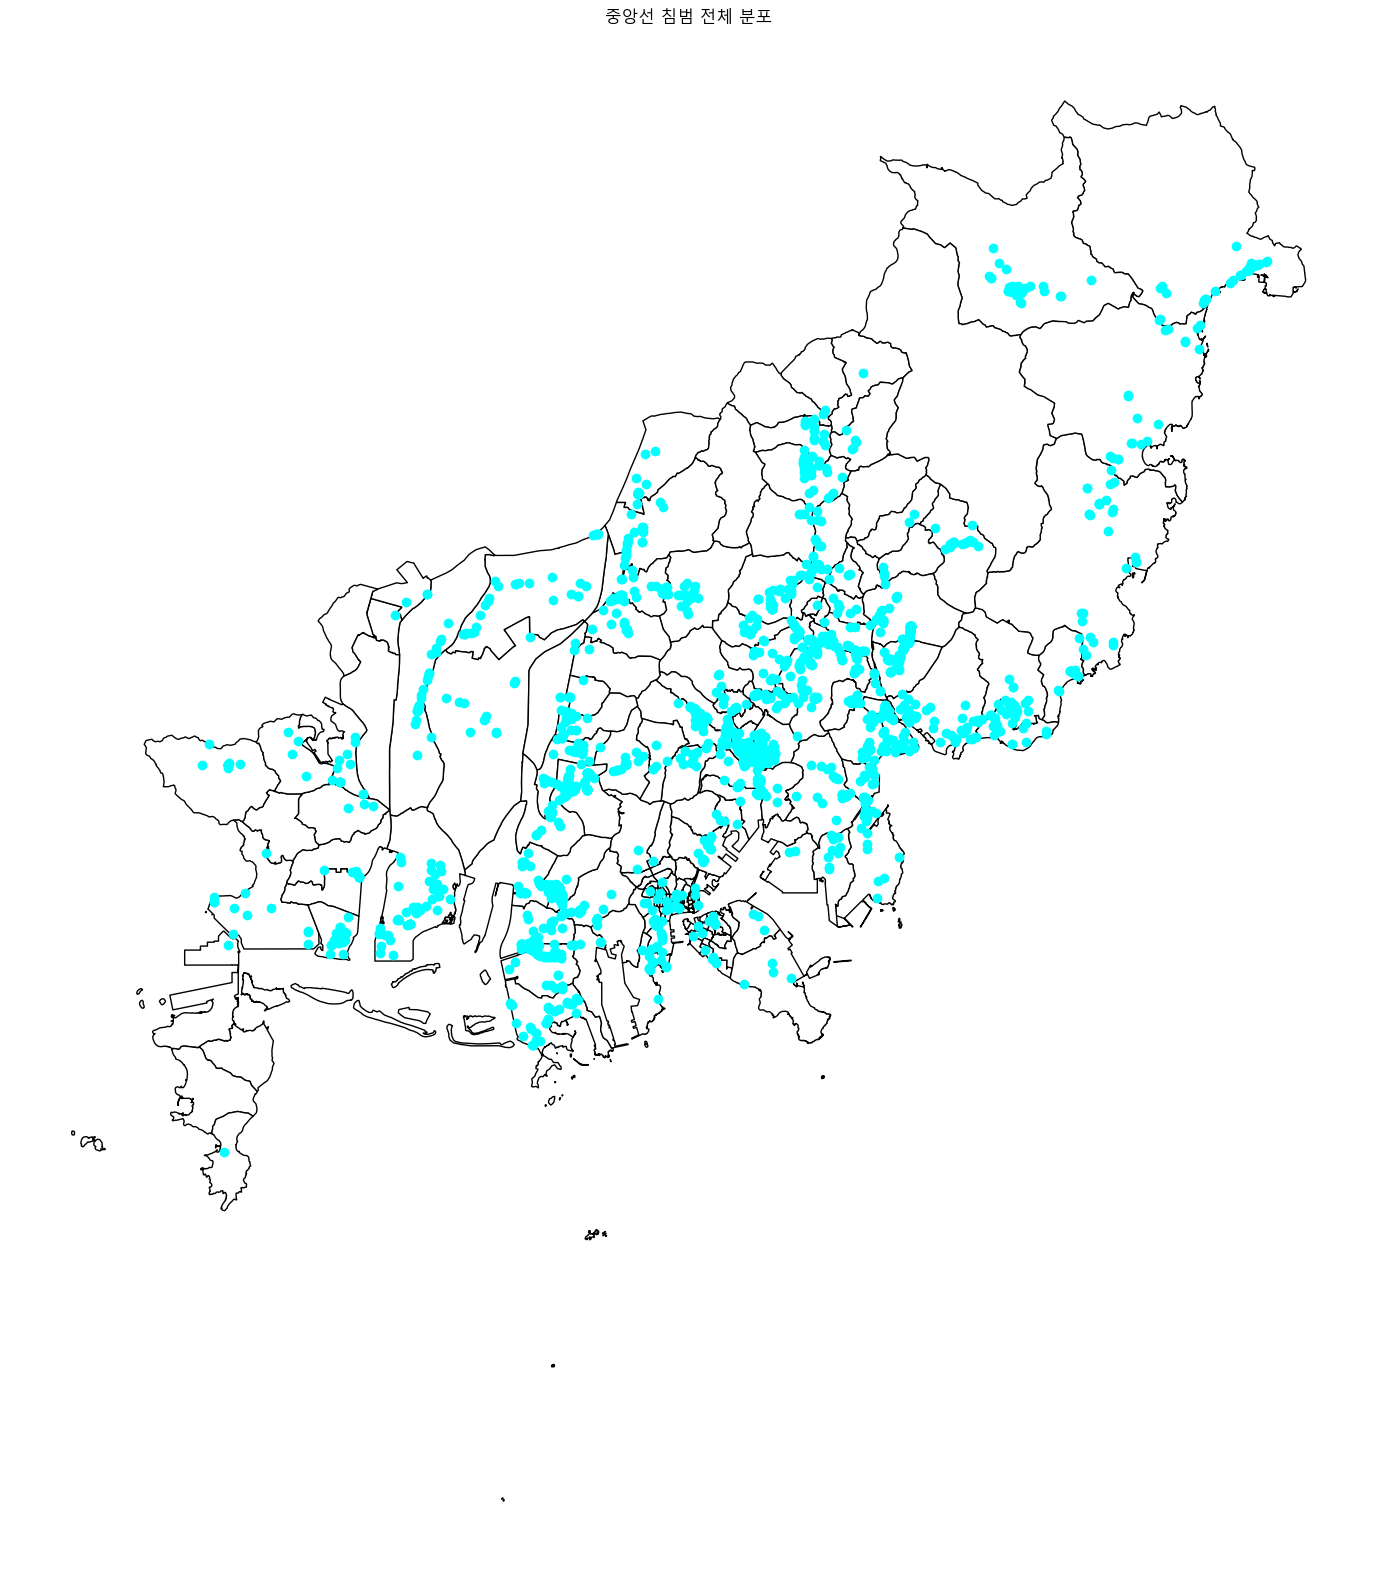

In [33]:
## 중앙선 침범 표시

## scatter 만
# plt.figure(figsize=(20, 20))
# plt.scatter(center['경도'], center['위도'], color="aqua", marker='o')

# plt.title("중앙선 침범 전체 분포")
# plt.xlabel("경도")
# plt.ylabel("위도")
# plt.axis('off')

## 지도 + scatter 표시
base = busan.plot(figsize=(20, 20), color="w", edgecolor="k")
base.scatter(center['경도'],center['위도'],color= "aqua",linewidths = 1)

base.set_axis_off()
base.set_title("중앙선 침범 전체 분포")
plt.show()

In [34]:
## 중앙선침범 top 10 추출 (경도,위도 기준)

filtered_values = center[['경도','위도']].value_counts().head(10).reset_index()
filtered_values.columns = ['경도','위도','count']

merged_data_center = center.merge(filtered_values, on=['경도','위도'], how='inner')
merged_data_center.drop_duplicates(inplace=True)
merged_data_center['신고내용'] = '중앙선침범'
merged_data_center

주소          경도         위도  시군구    읍면동  count   신고내용
0    부산광역시 사하구 장림동  506번길  128.977713  35.069894  사하구    장림동      3  중앙선침범
3    부산광역시 북구 금곡동  1881번길  129.011356  35.247553   북구    금곡동      2  중앙선침범
5   부산광역시 영도구 봉래동3가  55번길  129.045165  35.092284  영도구  봉래동3가      2  중앙선침범
7   부산광역시 강서구 대저1동  670번길  128.993400  35.232934  강서구   대저1동      2  중앙선침범
9    부산광역시 북구 금곡동  1881번길  129.011368  35.247580   북구    금곡동      2  중앙선침범
11   부산광역시 북구 금곡동  1881번길  129.011367  35.247535   북구    금곡동      2  중앙선침범
13   부산광역시 북구 금곡동  1881번길  129.011367  35.247553   북구    금곡동      2  중앙선침범
15    부산광역시 수영구 망미동  68번길  129.118073  35.176529  수영구    망미동      2  중앙선침범
17  부산광역시 연제구 연산동  1875번길  129.088822  35.173332  연제구    연산동      2  중앙선침범
19   부산광역시 사상구 괘법동  928번길  128.982367  35.167643  사상구    괘법동      2  중앙선침범

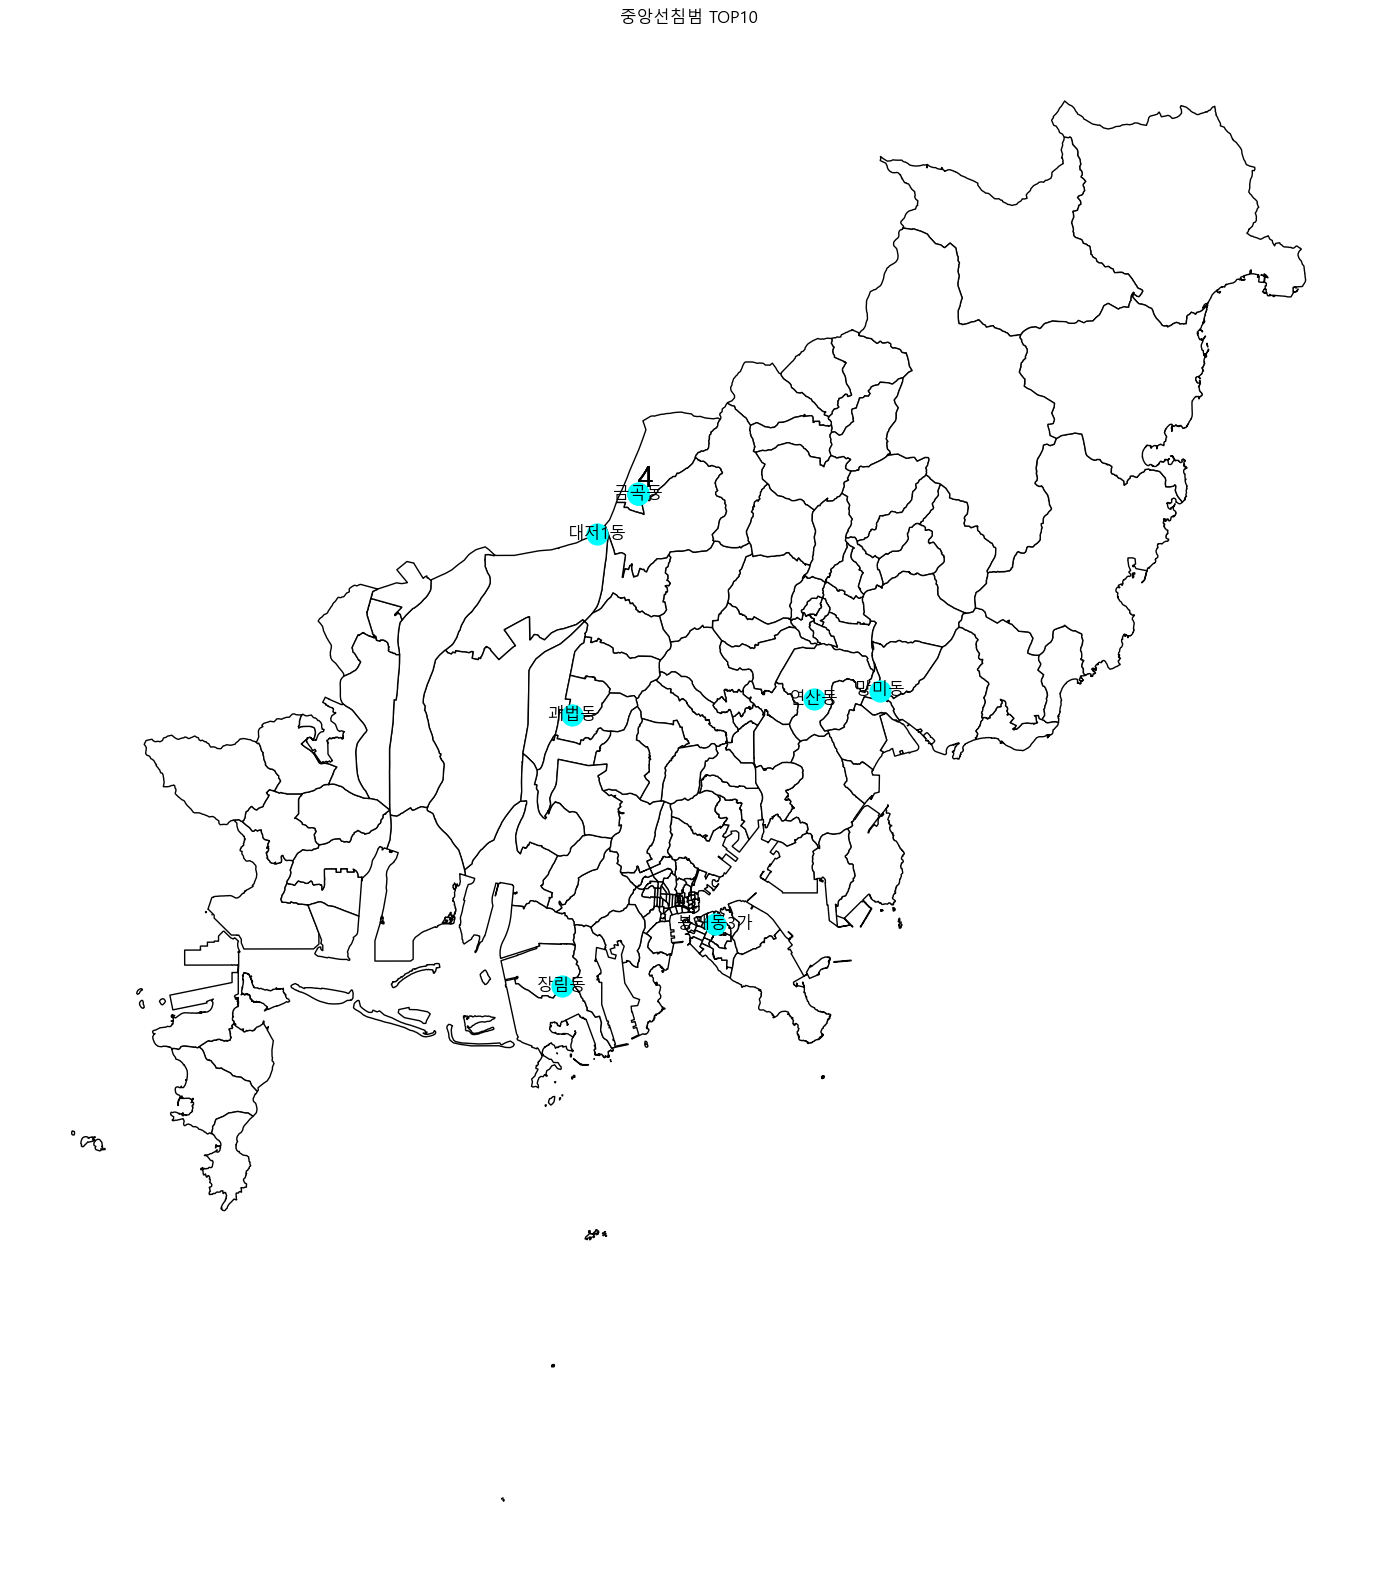

In [35]:
# 중앙선침범 TOP10 동 표시 (경도, 위도 기준)

base = busan.plot(figsize=(20, 20), color="w", edgecolor="k")

box = []
### top10 위치, 읍/면/동 표시
for i, r in merged_data_center.iterrows():
    base.scatter(r['경도'], r['위도'],color= "aqua",linewidths = 10)
    if r['읍면동'] not in box:
        box.append(r['읍면동'])
        base.text(r['경도'], r['위도'], r['읍면동'], fontsize=12, ha='center', va='center')
    else:
        box.append(r['읍면동'])

### 개수 추가
for i, r in merged_data_center.iterrows():
    if box.count(r['읍면동']) >= 2:
        base.text(r['경도'], r['위도'], box.count(r['읍면동']), fontsize=20, ha='left', va='bottom')
        # box.remove(r['읍면동'])
    else:
        pass
        
base.set_axis_off()
base.set_title("중앙선침범 TOP10")
plt.show()

### 신고데이터별 TOP10 전체 데이터 확인 

In [36]:
# 데이터프레임을 리스트에 담아서 concat으로 연결
declaration_top10_data = [merged_data_left, merged_data_uturn, merged_data_signal_violation, merged_data_course_violation, merged_data_center]
declaration_top10_dataframe = pd.concat(declaration_top10_data, axis=0, ignore_index=True)

# 결과 데이터프레임 확인
declaration_top10_dataframe

주소          경도         위도   시군구    읍면동  count  \
0      부산광역시 해운대구 우동 1427번길  129.132796  35.163426  해운대구     우동      5   
1        부산광역시 남구 문현동 687번길  129.065507  35.149413    남구    문현동      8   
2        부산광역시 사상구 엄궁동 10번길  128.972046  35.131170   사상구    엄궁동     12   
3        부산광역시 연제구 거제동 23번길  129.076834  35.188039   연제구    거제동      3   
4       부산광역시 금정구 장전동 241번길  129.084671  35.240238   금정구    장전동      3   
5         부산광역시 강서구 녹산동 5번길  128.894439  35.122138   강서구    녹산동      7   
6      부산광역시 사상구 주례동 1164번길  129.000164  35.150221   사상구    주례동      6   
7       부산광역시 사상구 엄궁동 642번길  128.965258  35.132104   사상구    엄궁동      3   
8       부산광역시 사상구 학장동 389번길  128.987940  35.143487   사상구    학장동      5   
9       부산광역시 남구 대연동 1014번길  129.101485  35.130097    남구    대연동      6   
10      부산광역시 사하구 장림동 506번길  128.977713  35.069894   사하구    장림동      3   
11      부산광역시 금정구 장전동 241번길  129.084639  35.240284   금정구    장전동      2   
12      부산광역시 금정구 장전동 241번길  129.084639  35.240275   금정구    장전동      2   
13      부산광역시 금정구 장전동 241번길  129.084671  35.240238   금정구    장전동      2   
14      부산광역시 금정구 장전동 241번길  129.084669  35.240184   금정구    장전동      2   
15      부산광역시 남구 대연동 1907번길  129.095219  35.136063    남구    대연동      2   
16      부산광역시 수영구 망미동 206번길  129.117790  35.176340   수영구    망미동      2   
17      부산광역시 남구 대연동 1903번길  129.094960  35.136468    남구    대연동      2   
18      부산광역시 사하구 당리동 315번길  128.973233  35.104932   사하구    당리동      2   
19     부산광역시 금정구 두구동 1321번길  129.103286  35.297787   금정구    두구동      2   
20     부산광역시 사하구 구평동  106번길  128.986368  35.085978   사하구    구평동      4   
21      부산광역시 남구 대연동  599번길  129.103386  35.130514    남구    대연동      2   
22      부산광역시 사상구 엄궁동  10번길  128.972046  35.131170   사상구    엄궁동      8   
23  부산광역시 기장군 철마면 고촌리 693번길  129.168568  35.236181   기장군    철마면      2   
24    부산광역시 강서구 명지동  3400번길  128.916694  35.096423   강서구    명지동      7   
25      부산광역시 금정구 남산동  13번길  129.092712  35.268169   금정구    남산동      2   
26     부산광역시 사상구 학장동  731번길  128.978763  35.141219   사상구    학장동      3   
27     부산광역시 강서구 명지동  401번길  128.919031  35.114767   강서구    명지동      2   
28     부산광역시 사하구 당리동  315번길  128.973233  35.104932   사하구    당리동      2   
29    부산광역시 부산진구 부암동  315번길  129.048593  35.167475  부산진구    부암동      5   
30     부산광역시 해운대구 우동 1427번길  129.132796  35.163426  해운대구     우동      5   
31     부산광역시 해운대구 재송동 774번길  129.120329  35.179260  해운대구    재송동     11   
32       부산광역시 금정구 부곡동 13번길  129.102150  35.237419   금정구    부곡동     11   
33       부산광역시 북구 만덕동 597번길  129.036443  35.212882    북구    만덕동      3   
34       부산광역시 사상구 엄궁동 10번길  128.972046  35.131170   사상구    엄궁동      5   
35       부산광역시 사상구 모라동 14번길  129.015139  35.178875   사상구    모라동      8   
36     부산광역시 부산진구 전포동 889번길  129.063578  35.150387  부산진구    전포동      3   
37      부산광역시 사상구 감전동 873번길  128.971691  35.152635   사상구    감전동      4   
38   부산광역시 기장군 철마면 연구리 15번길  129.166177  35.279894   기장군    철마면      6   
39        부산광역시 강서구 녹산동 5번길  128.894439  35.122138   강서구    녹산동      4   
40     부산광역시 사하구 장림동  506번길  128.977713  35.069894   사하구    장림동      3   
41     부산광역시 북구 금곡동  1881번길  129.011356  35.247553    북구    금곡동      2   
42    부산광역시 영도구 봉래동3가  55번길  129.045165  35.092284   영도구  봉래동3가      2   
43    부산광역시 강서구 대저1동  670번길  128.993400  35.232934   강서구   대저1동      2   
44     부산광역시 북구 금곡동  1881번길  129.011368  35.247580    북구    금곡동      2   
45     부산광역시 북구 금곡동  1881번길  129.011367  35.247535    북구    금곡동      2   
46     부산광역시 북구 금곡동  1881번길  129.011367  35.247553    북구    금곡동      2   
47      부산광역시 수영구 망미동  68번길  129.118073  35.176529   수영구    망미동      2   
48    부산광역시 연제구 연산동  1875번길  129.088822  35.173332   연제구    연산동      2   
49     부산광역시 사상구 괘법동  928번길  128.982367  35.167643   사상구    괘법동      2   

        신고내용  
0      불법좌회전  
1      불법좌회전  
2      불법좌회전  
3      불법좌회전  
4      불법좌회전  
5      불법좌회전  
6      불법좌회전  
7      불법좌회전  
8      불법좌회전  
9      불법좌회전  
10      불법유턴  
11      불법유턴  
12      불법유턴  
13      불법유턴  
14      불법유턴  
15      불법

### 핫스팟 위치

In [37]:
import pandas as pd

data = {
    '위도': [35.236214, 35.114731, 35.089073, 35.175248],
    '경도': [129.168629, 128.919296, 128.912441, 129.081621]
}

data2 = {
    '위도' : [35.13605, 35.240258, 35.105925],
    '경도' : [129.095246, 129.084661, 128.968682]
}

hotspot = pd.DataFrame(data)
hotspot2 = pd.DataFrame(data2)

hotspot, hotspot2

(          위도          경도
 0  35.236214  129.168629
 1  35.114731  128.919296
 2  35.089073  128.912441
 3  35.175248  129.081621,
           위도          경도
 0  35.136050  129.095246
 1  35.240258  129.084661
 2  35.105925  128.968682)

#### 신고데이터별 TOP10 & 핫스팟 위치 시각화

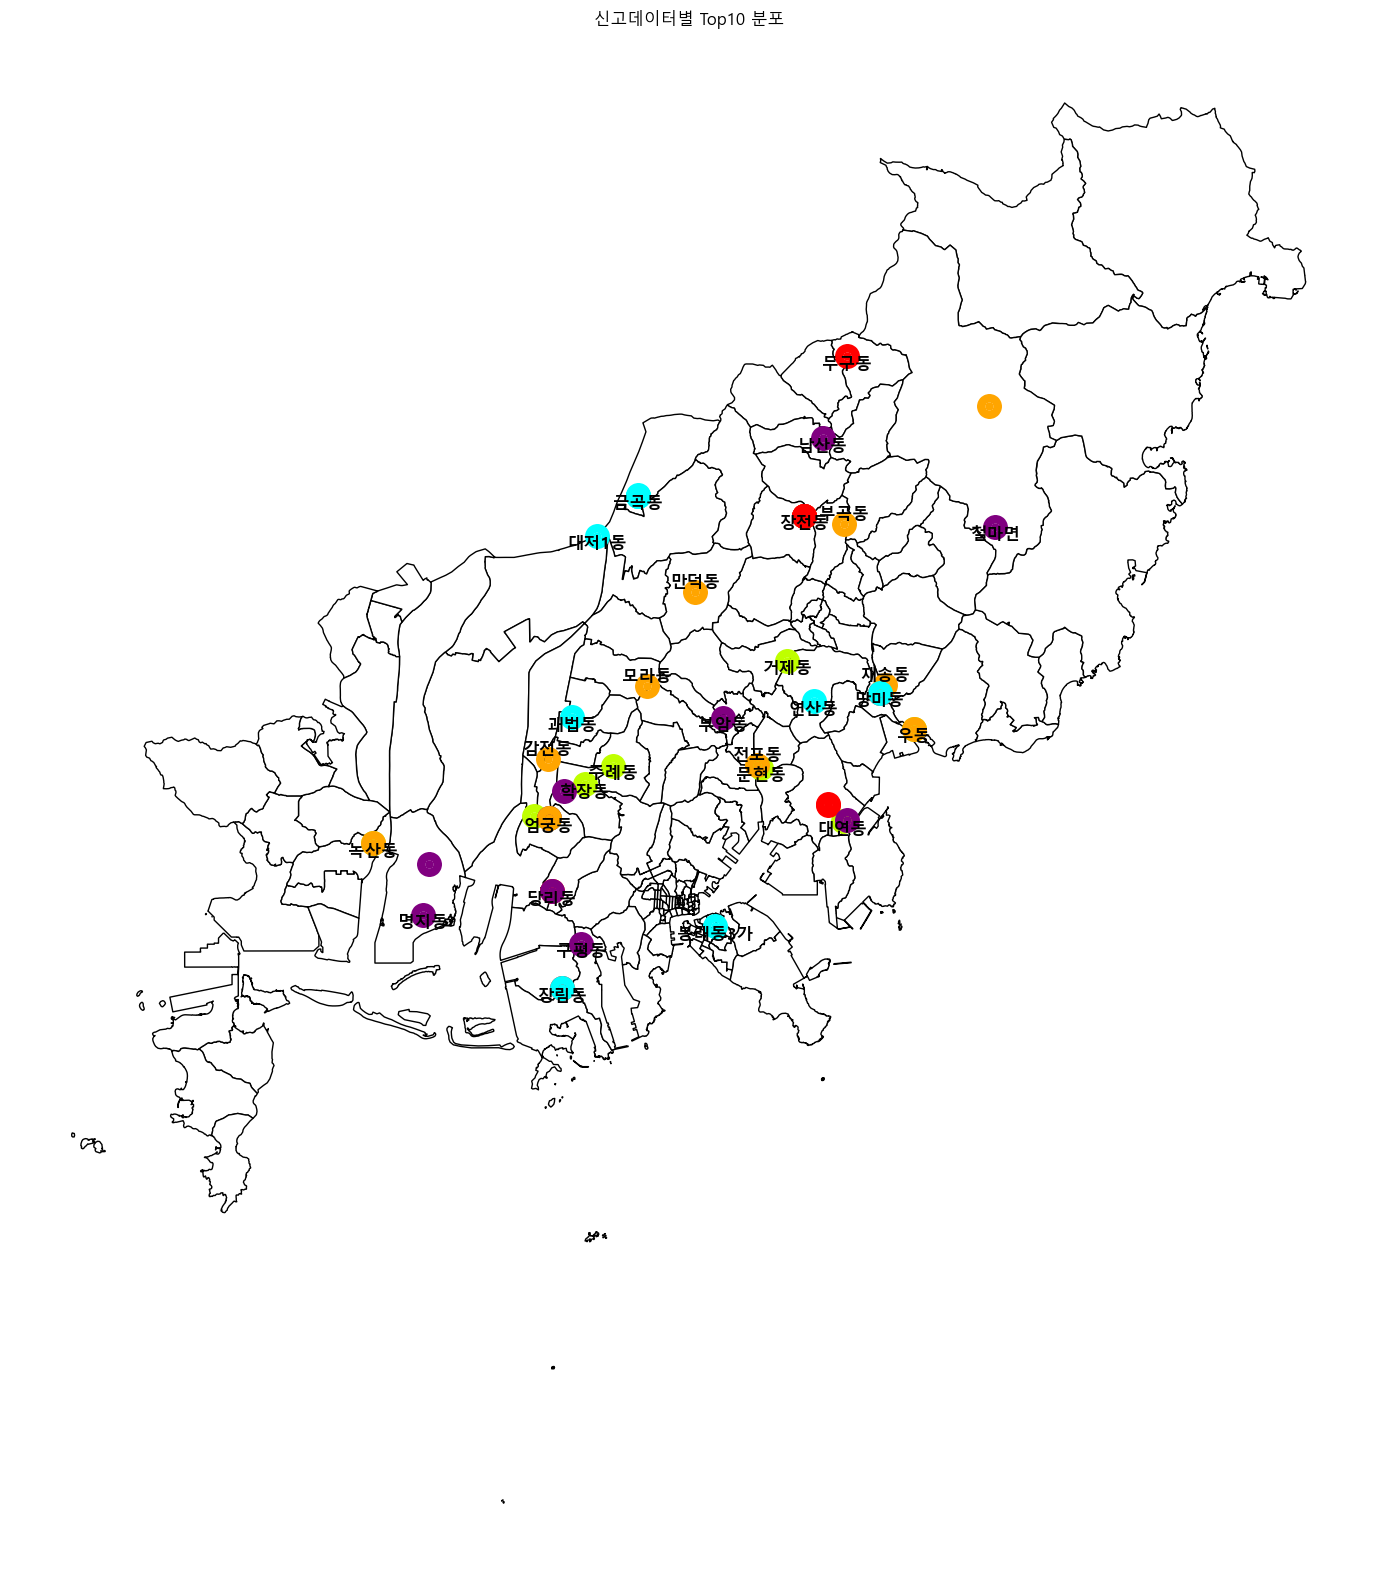

In [38]:
## 신고데이터별 Top10 표시

base = busan.plot(figsize=(20, 20), color="w", edgecolor="k")
color_box = ['green','yellow','red', 'blue','pink']

base.scatter(merged_data_left['경도'],merged_data_left['위도'],color= "#bfff00",linewidths = 12, label='불법좌회전')
base.scatter(merged_data_uturn['경도'],merged_data_uturn['위도'],color= "red",linewidths = 12, label='불법유턴')
base.scatter(merged_data_signal_violation['경도'],merged_data_signal_violation['위도'],color= "purple",linewidths = 12, label='신호위반')
base.scatter(merged_data_course_violation['경도'],merged_data_course_violation['위도'],color= "orange",linewidths = 12, label='진로변경방법위반')
base.scatter(merged_data_center['경도'],merged_data_center['위도'],color= "aqua",linewidths = 12, label='중앙선침범')

# base.scatter(hotspot['경도'],hotspot['위도'],color= "hotpink",linewidths = 20, label='hotspot')  # 핫스팟
# base.scatter(hotspot2['경도'],hotspot2['위도'],color= "yellow",linewidths = 20, label='hotspot2')  # 핫스팟

box = []
for i, r in declaration_top10_dataframe.iterrows():
    if r['읍면동'] not in box and r['신고내용'] == '진로변경방법위반':
        box.append(r['읍면동'])
        base.text(r['경도'], r['위도'], r['읍면동'], fontsize=12, ha='center', va='bottom', fontweight='bold')
    elif r['읍면동'] not in box:
        box.append(r['읍면동'])
        base.text(r['경도'], r['위도'], r['읍면동'], fontsize=12, ha='center', va='top', fontweight='bold')
    else:
        pass
        box.append(r['읍면동'])

base.set_axis_off()
base.set_title("신고데이터별 Top10 분포")
# plt.legend()
plt.show()

### 도로분리대

In [39]:
road_divider = './data/도로분리대/Z_NGII_N3L_C0520000.shp'
road_divider = gpd.read_file(road_divider)

# 도로분리대 좌표계 달라서 변경
road_divider = road_divider.to_crs(epsg=4326)
print(road_divider.crs) 

EPSG:4326


In [40]:
# 도로 분리대 데이터 중에서 부산 지역에 해당하는 데이터만 필터링
road_divider_busan = road_divider[road_divider.intersects(busan.unary_union)]
road_divider_busan

UFID    STRU  SCLS  FMTA  \
47250  TRN07000000010JIG  MSS003   NaN   NaN   
47251  TRN07000000010JJH  MSS001   NaN   NaN   
47252  TRN07000000010JKI  MSS003   NaN   NaN   
47253  TRN07000000010JLJ  MSS003   NaN   NaN   
47254  TRN07000000010JMK  MSS003   NaN   NaN   
...                  ...     ...   ...   ...   
52342  TRN07000000014GYX  MSS003   NaN   NaN   
52343  TRN07000000014GZY  MSS003   NaN   NaN   
52344  TRN07000000014H00  MSS003   NaN   NaN   
52345  TRN07000000014H11  MSS002   NaN   NaN   
52346  TRN07000000014H22  MSS002   NaN   NaN   

                                                geometry  
47250  LINESTRING (128.89759 35.12512, 128.89747 35.1...  
47251  LINESTRING (128.90000 35.12986, 128.90000 35.1...  
47252  LINESTRING (128.87479 35.14239, 128.87500 35.1...  
47253  LINESTRING (128.99192 35.20241, 128.99157 35.2...  
47254  LINESTRING (128.90103 35.17538, 128.90103 35.1...  
...                                                  ...  
52342  LINESTRING (129.02093 35.24287, 129.02093 35.2...  
52343  LINESTRING (129.00871 35.23833, 129.00871 35.2...  
52344  LINESTRING (129.00752 35.23183, 129.00751 35.2...  
52345  LINESTRING (129.00133 35.23565, 129.00189 35.2...  
52346  LINESTRING (129.00458 35.23569, 129.00506 35.2...  

[1091 rows x 5 columns]

In [41]:
#road_divider_busan.to_csv('도로분리대_부산.csv',index=False, encoding="utf-8-sig")

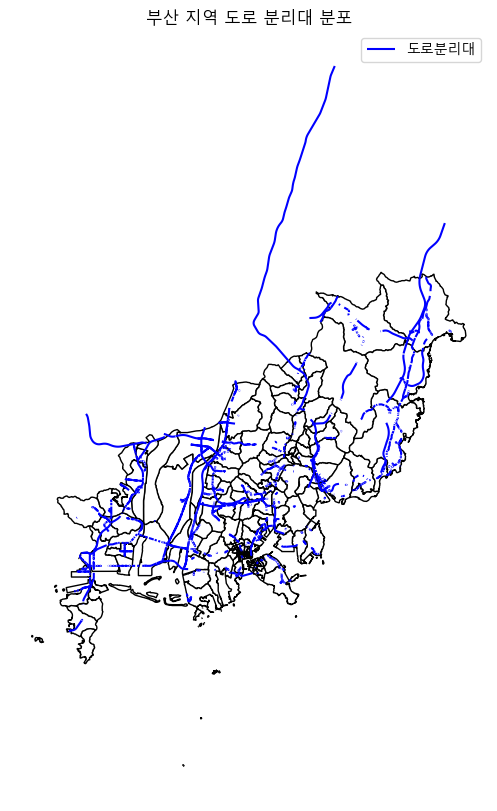

In [42]:
## 도로분리대 - 신고데이터 Top10 표시
base = busan.plot(figsize=(10, 10), color="w", edgecolor="k") # 부산 지도
ax = road_divider_busan.plot(ax=base, marker='o', color='blue', markersize=30, label='도로분리대')  # 도로분리대 추가

# ax.scatter(merged_data_left['경도'],merged_data_left['위도'],color= "#bfff00",linewidths = 12, label='불법좌회전')
# ax.scatter(merged_data_uturn['경도'],merged_data_uturn['위도'],color= "red",linewidths = 12, label='불법유턴')
# ax.scatter(merged_data_signal_violation['경도'],merged_data_signal_violation['위도'],color= "yellow",linewidths = 12, label='신호위반')
# ax.scatter(merged_data_course_violation['경도'],merged_data_course_violation['위도'],color= "orange",linewidths = 12, label='진로변경방법위반')
# ax.scatter(merged_data_center['경도'],merged_data_center['위도'],color= "pink",linewidths = 12, label='중앙선침범')

ax.set_axis_off()
ax.set_title("부산 지역 도로 분리대 분포")
plt.legend()
plt.show()

### CCTV

In [43]:
busan_cctv = pd.read_excel('./data/부산_수집데이터/부산_신호위반단속카메라.xlsx')

from shapely.geometry import Point

geometry = [Point(xy) for xy in zip(busan_cctv['경도'], busan_cctv['위도'])] # geometry로 변환
cctv = gpd.GeoDataFrame(busan_cctv, geometry=geometry, crs="EPSG:4326")
cctv.head(2)

무인교통단속카메라관리번호    시도명 시군구명  도로종류  도로노선번호 도로노선명  도로노선방향 소재지도로명주소  \
0         F8918  부산광역시  기장군   지방도       2   정관로       2      NaN   
1         F8917  부산광역시  기장군  특별시도       1   용수로       1      NaN   

                    소재지지번주소         위도  ...  단속구간위치구분 과속단속구간길이  보호구역구분  설치연도  \
0    부산광역시 기장군 정관읍 달산리 1201  35.319692  ...       NaN      NaN     2.0  2016   
1  부산광역시 기장군 정관읍 용수리 1312-1  35.326046  ...       NaN      NaN     2.0  2016   

      관리기관명      관리기관전화번호    데이터기준일자   제공기관코드 제공기관명  \
0  부산광역시경찰청  051-899-2852 2023-03-13  1320000   경찰청   
1  부산광역시경찰청  051-899-2852 2023-03-13  1320000   경찰청   

                     geometry  
0  POINT (129.18671 35.31969)  
1  POINT (129.17796 35.32605)  

[2 rows x 24 columns]

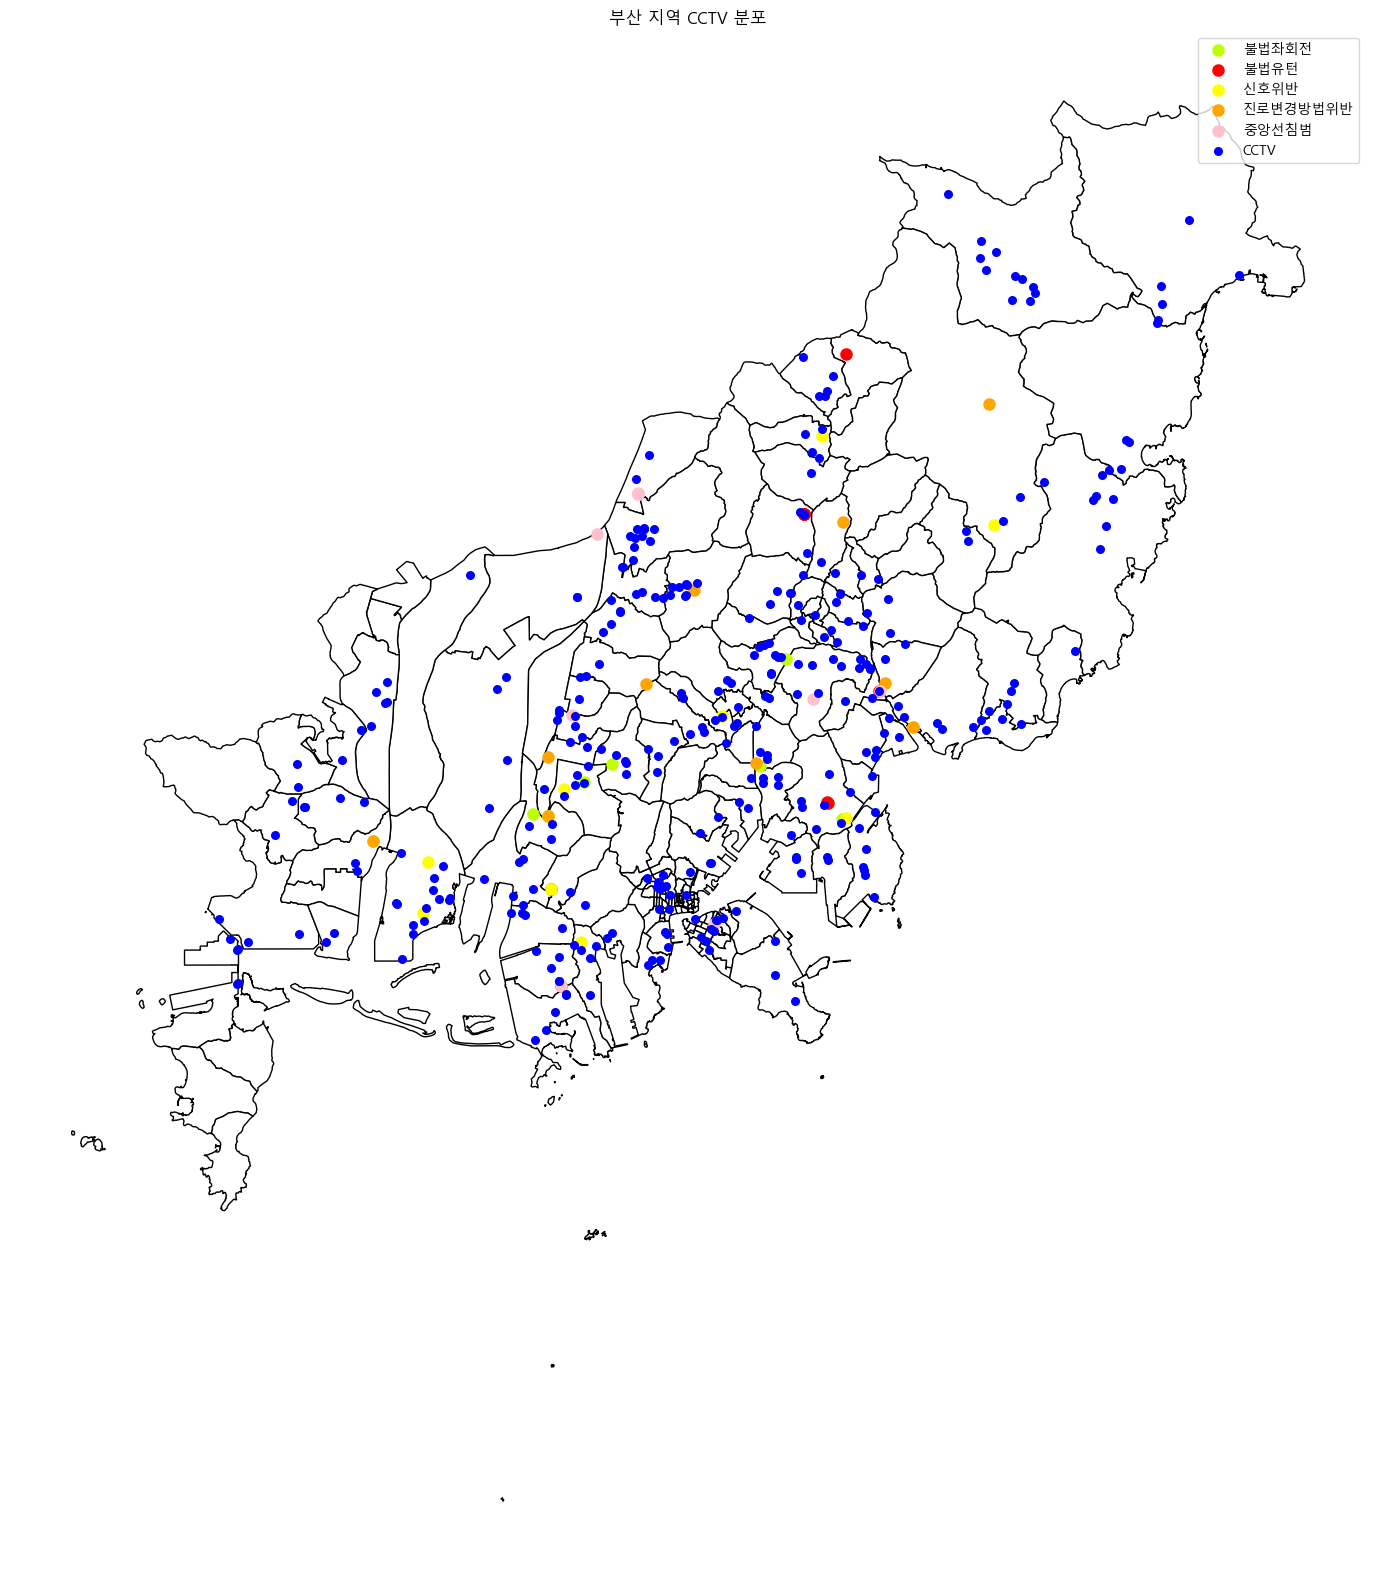

In [62]:
## CCTV - 신고데이터 top10 표시
base = busan.plot(figsize=(20, 20), color="w", edgecolor="k") # 부산 지도

base.scatter(merged_data_left['경도'],merged_data_left['위도'],color= "#bfff00",linewidths = 3, label='불법좌회전')
base.scatter(merged_data_uturn['경도'],merged_data_uturn['위도'],color= "red",linewidths = 3, label='불법유턴')
base.scatter(merged_data_signal_violation['경도'],merged_data_signal_violation['위도'],color= "yellow",linewidths = 3, label='신호위반')
base.scatter(merged_data_course_violation['경도'],merged_data_course_violation['위도'],color= "orange",linewidths = 3, label='진로변경방법위반')
base.scatter(merged_data_center['경도'],merged_data_center['위도'],color= "pink",linewidths = 3, label='중앙선침범')

ax = cctv.plot(ax=base, marker='o', color='blue', markersize=30, label = 'CCTV')  # cctv 추가

ax.set_axis_off()
ax.set_title("부산 지역 CCTV 분포")
plt.legend()
plt.show()

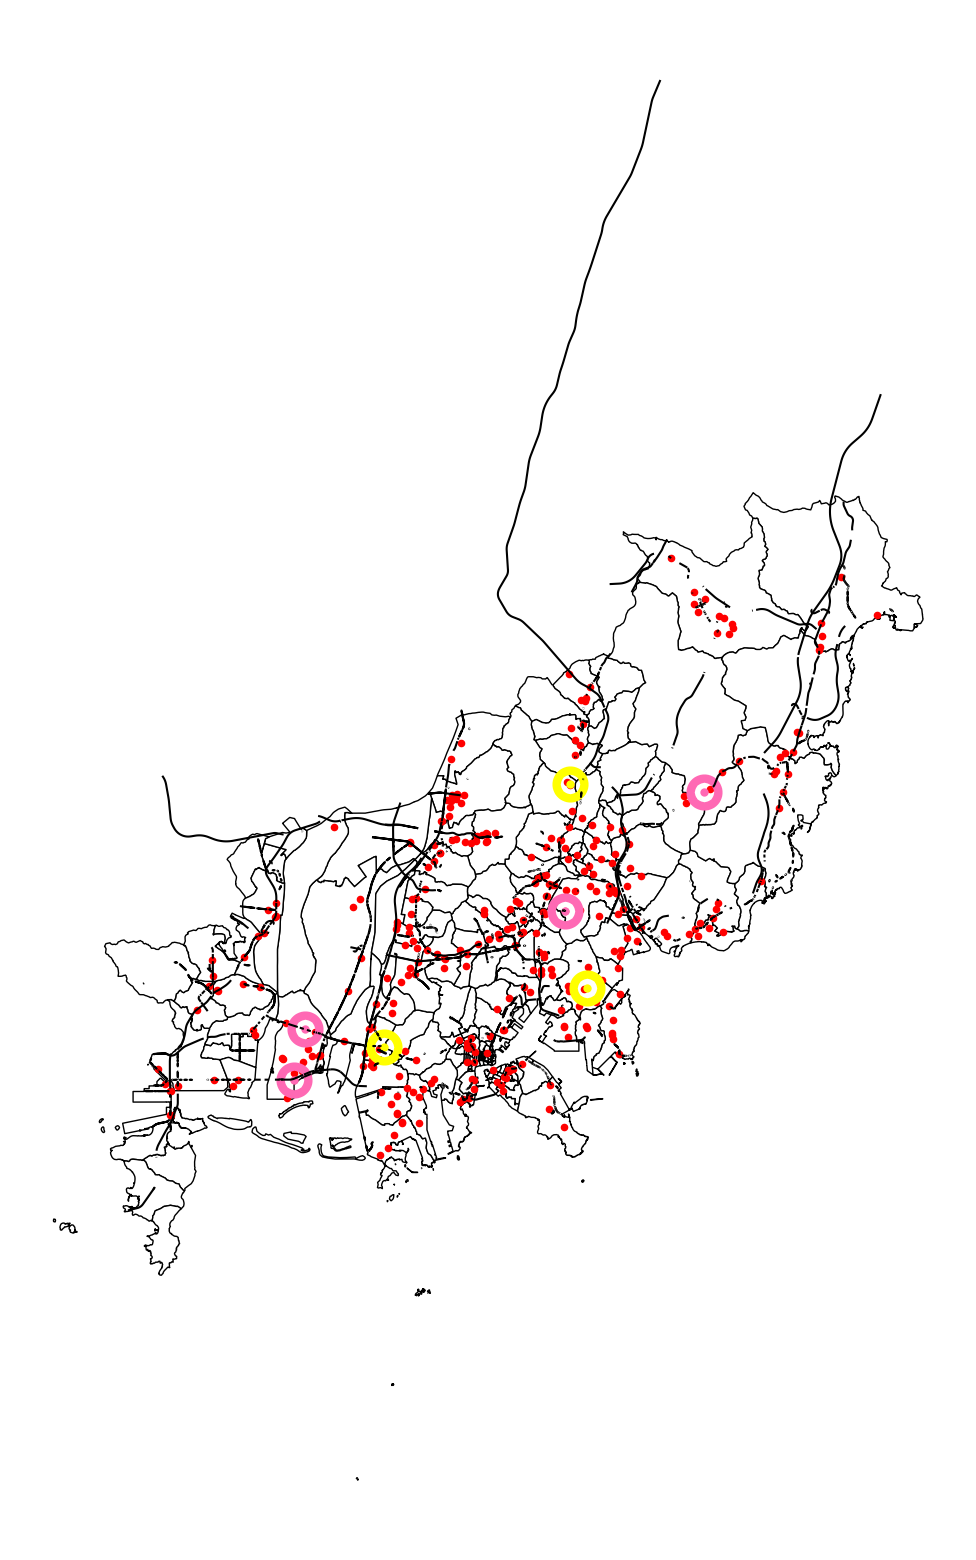

In [45]:
base = busan.plot(figsize=(20, 20), color="w", edgecolor="k")

ax = road_divider_busan.plot(ax=base, marker='o', color='black', markersize=30, label='도로분리대')  # 도로분리대 추가
ax = cctv.plot(ax=ax, marker='o', color='red', markersize=20, label = 'CCTV')  # cctv 추가
ax.scatter(hotspot['경도'],hotspot['위도'],color= "hotpink",linewidths = 20, label='hotspot')  # 핫스팟
ax.scatter(hotspot2['경도'],hotspot2['위도'],color= "yellow",linewidths = 20, label='hotspot2')  # 핫스팟

ax.set_axis_off()
# ax.set_title("CCTV_도로분리대_핫스팟")
# plt.legend()
plt.show()

### 통행량 데이터

In [46]:
통행량 = pd.read_excel('./data/부산_수집데이터/시군구별 추정 통행량(2021).xlsx')
통행량['시군구'] = 통행량['시군구'].astype(str)
통행량.dropna(inplace=True)
통행량.drop(17, inplace=True)
통행량

시군구     통행량
0     중구   84053
1     서구  100113
2     동구   85183
3    영도구   75374
4   부산진구  189317
5    동래구   96685
6     남구  151542
7     북구  111742
8   해운대구  152293
9    사하구  124040
10   금정구  122479
11   강서구   85291
12   연제구   97108
13   수영구  131957
14   사상구  127826
15   기장군   30568

### 부산_읍면동

In [47]:
busan_dong = './data/부산_수집데이터/부산_읍면동/LSMD_ADM_SECT_UMD_26_202309.shp'
busan_dong = gpd.read_file(busan_dong, encoding='cp949')
busan_dong = busan_dong.to_crs(epsg=4326)
busan_dong['COL_ADM_SE'] = busan_dong['COL_ADM_SE'].astype(int) # objects에서 int로 형변환

### 부산_시군구

In [48]:
from shapely import wkt

busan_si = pd.read_csv('./data/부산_수집데이터/시군구_busan.csv')
busan_si['geometry'] = busan_si['geometry'].apply(wkt.loads)
busan_si = gpd.GeoDataFrame(busan_si, geometry='geometry', crs='EPSG:4326')
busan_si

SIG_CD    SIG_ENG_NM SIG_KOR_NM  \
0    26110       Jung-gu         중구   
1    26140        Seo-gu         서구   
2    26170       Dong-gu         동구   
3    26200    Yeongdo-gu        영도구   
4    26230   Busanjin-gu       부산진구   
5    26260    Dongnae-gu        동래구   
6    26290        Nam-gu         남구   
7    26320        Buk-gu         북구   
8    26350   Haeundae-gu       해운대구   
9    26380       Saha-gu        사하구   
10   26410  Geumjeong-gu        금정구   
11   26440    Gangseo-gu        강서구   
12   26470     Yeonje-gu        연제구   
13   26500    Suyeong-gu        수영구   
14   26530     Sasang-gu        사상구   
15   26710    Gijang-gun        기장군   

                                             geometry  
0   POLYGON ((1139632.89992 1681213.67405, 1139636...  
1   MULTIPOLYGON (((1138209.33698 1673609.18301, 1...  
2   POLYGON ((1140524.12204 1684496.50596, 1140581...  
3   MULTIPOLYGON (((1145321.80331 1672570.51436, 1...  
4   POLYGON ((1140191.57977 1690472.92142, 1140221...  
5   POLYGON ((1143701.56290 1693332.11198, 1143705...  
6   MULTIPOLYGON (((1148310.87663 1678526.12575, 1...  
7   POLYGON ((1135429.92092 1690582.27269, 1135430...  
8   MULTIPOLYGON (((1149277.43697 1686046.55331, 1...  
9   MULTIPOLYGON (((1132683.97344 1655379.65122, 1...  
10  POLYGON ((1147123.82349 1692139.26862, 1147122...  
11  MULTIPOLYGON (((1116468.76155 1669207.32204, 1...  
12  POLYGON ((1143666.52290 1690487.70039, 1143675...  
13  POLYGON ((1148194.93583 1685460.12376, 1148191...  
14  POLYGON ((1135734.12665 1689743.37263, 1135758...  
15  MULTIPOLYGON (((1157412.19067 1692681.39919, 1...

### 부산 시군구/읍면동/통행량 merge

In [49]:
busan_si_dong = pd.merge(busan_dong,busan_si,left_on='COL_ADM_SE',right_on='SIG_CD',how='inner')
busan_si_dong_통행량 = pd.merge(busan_si_dong,통행량,left_on='SIG_KOR_NM',right_on='시군구',how='inner')
busan_si_dong_통행량.drop(['SIG_CD', 'SIG_ENG_NM', 'SIG_KOR_NM', 'geometry_y'], axis=1, inplace=True)
busan_si_dong_통행량.set_geometry('geometry_x', inplace=True)

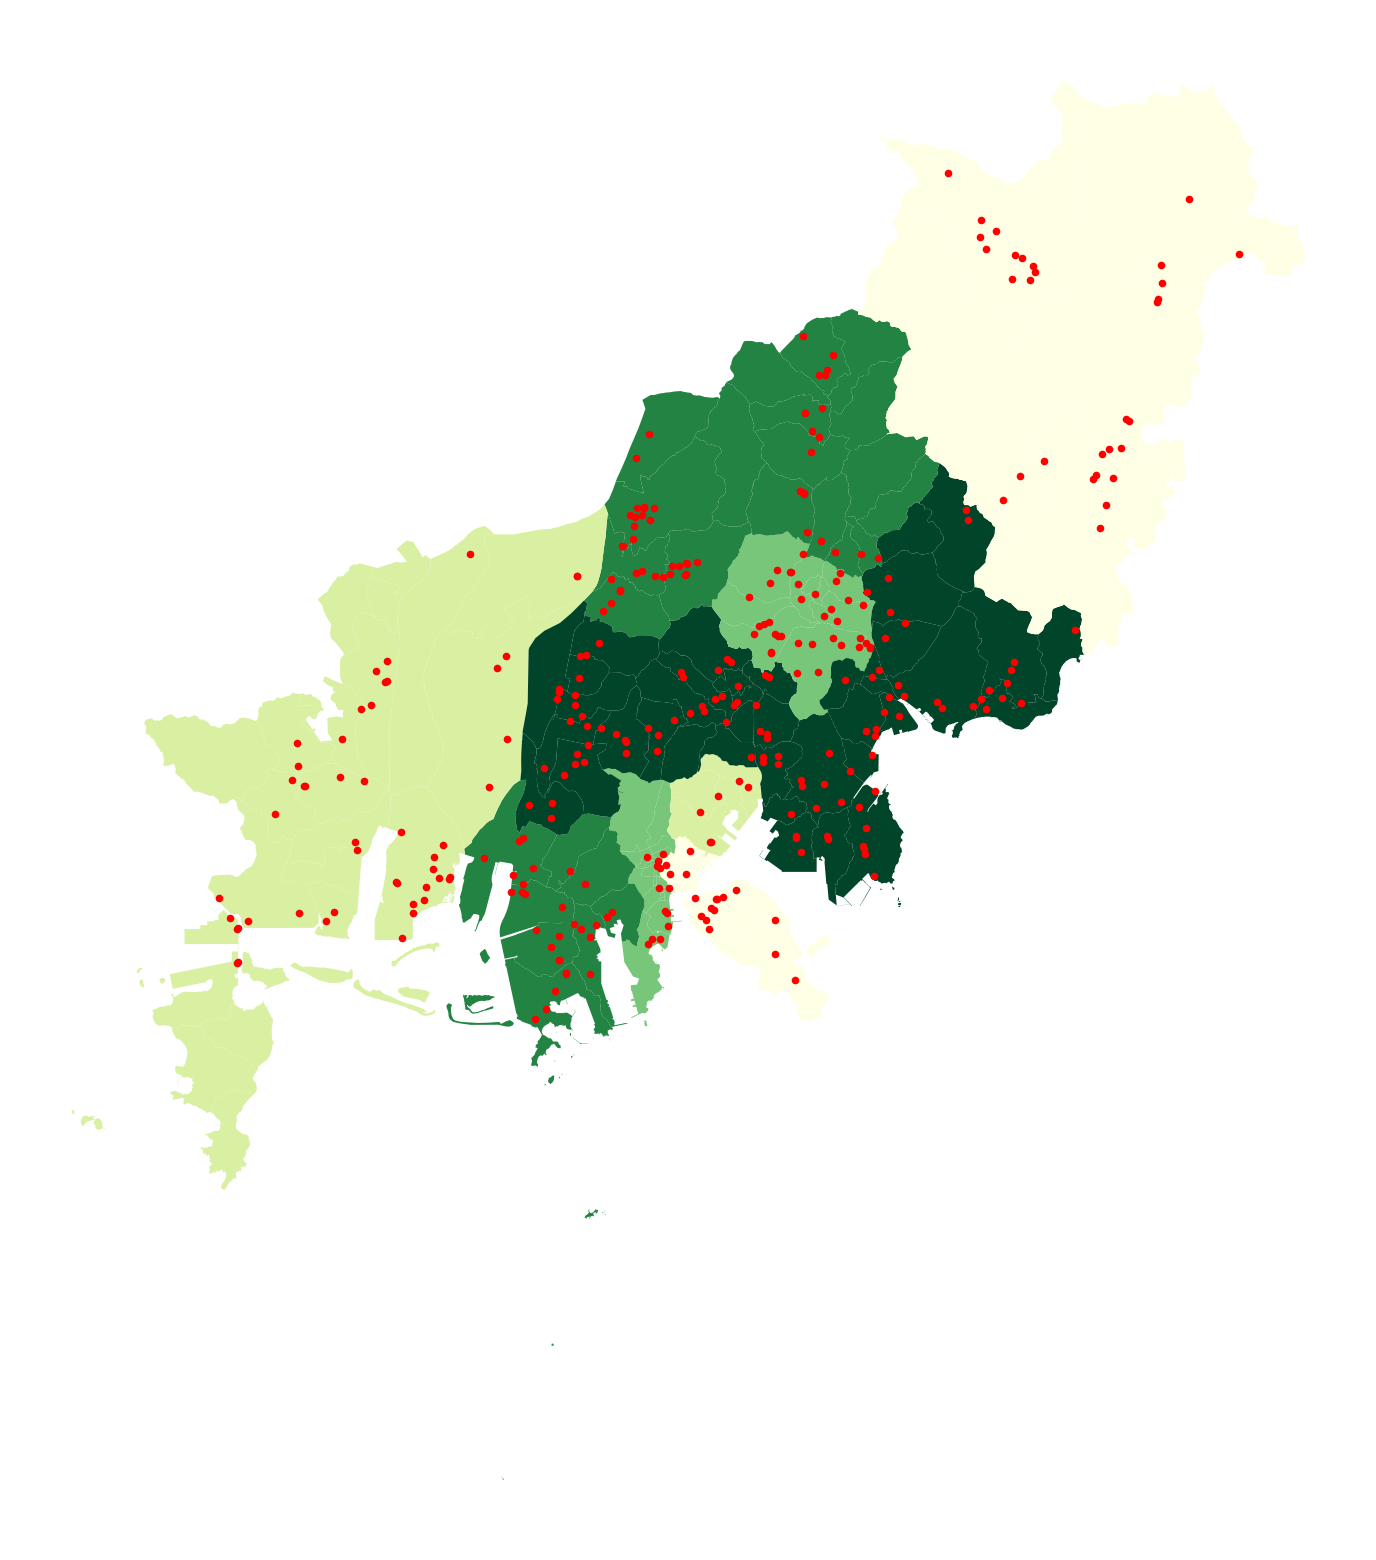

In [50]:
## CCTV - 신고데이터 top10 표시

# 통행량 있는 데이터셋
base = busan_si_dong_통행량.plot(figsize=(20, 20),column='통행량', scheme='quantiles', cmap="YlGn", k=5) # 부산 지도 , edgecolor="k" (동나누기)
ax = cctv.plot(ax=base, marker='o', color='red', markersize=20, label = 'CCTV')  # cctv 추가

ax.set_axis_off()
# ax.set_title("통행량 대비 CCTV")
# plt.legend()
plt.show()

## 핫스팟 적용

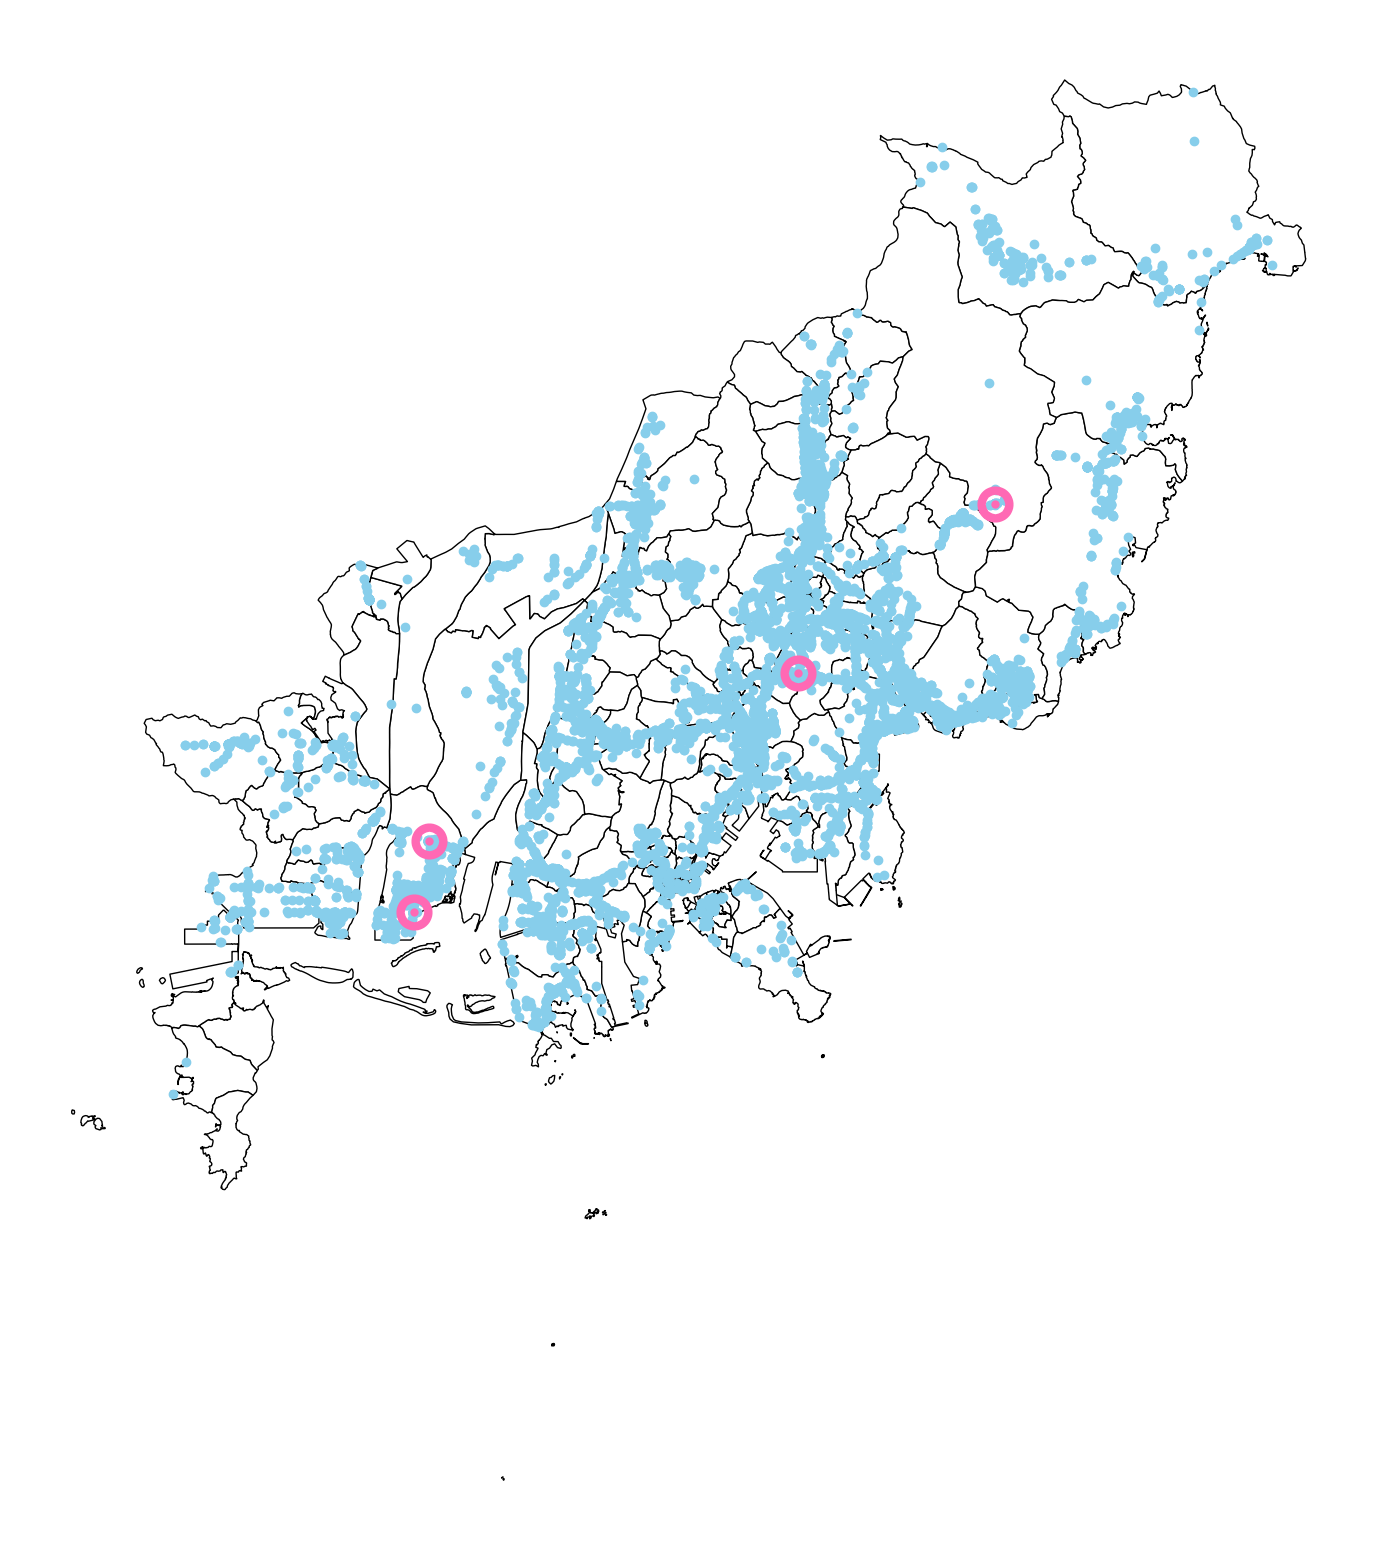

In [55]:
# 불법좌회전 + 신호위반 + 핫스팟
base = busan.plot(figsize=(20, 20), color="w", edgecolor="k")
 
base.scatter(left['경도'],left['위도'],color= "skyblue",linewidths = 1)
base.scatter(signal_violation['경도'],signal_violation['위도'],color= "skyblue",linewidths = 1)

base.scatter(hotspot['경도'],hotspot['위도'],color= "hotpink",linewidths = 20, label='hotspot')  # 핫스팟

base.set_axis_off()
plt.show()

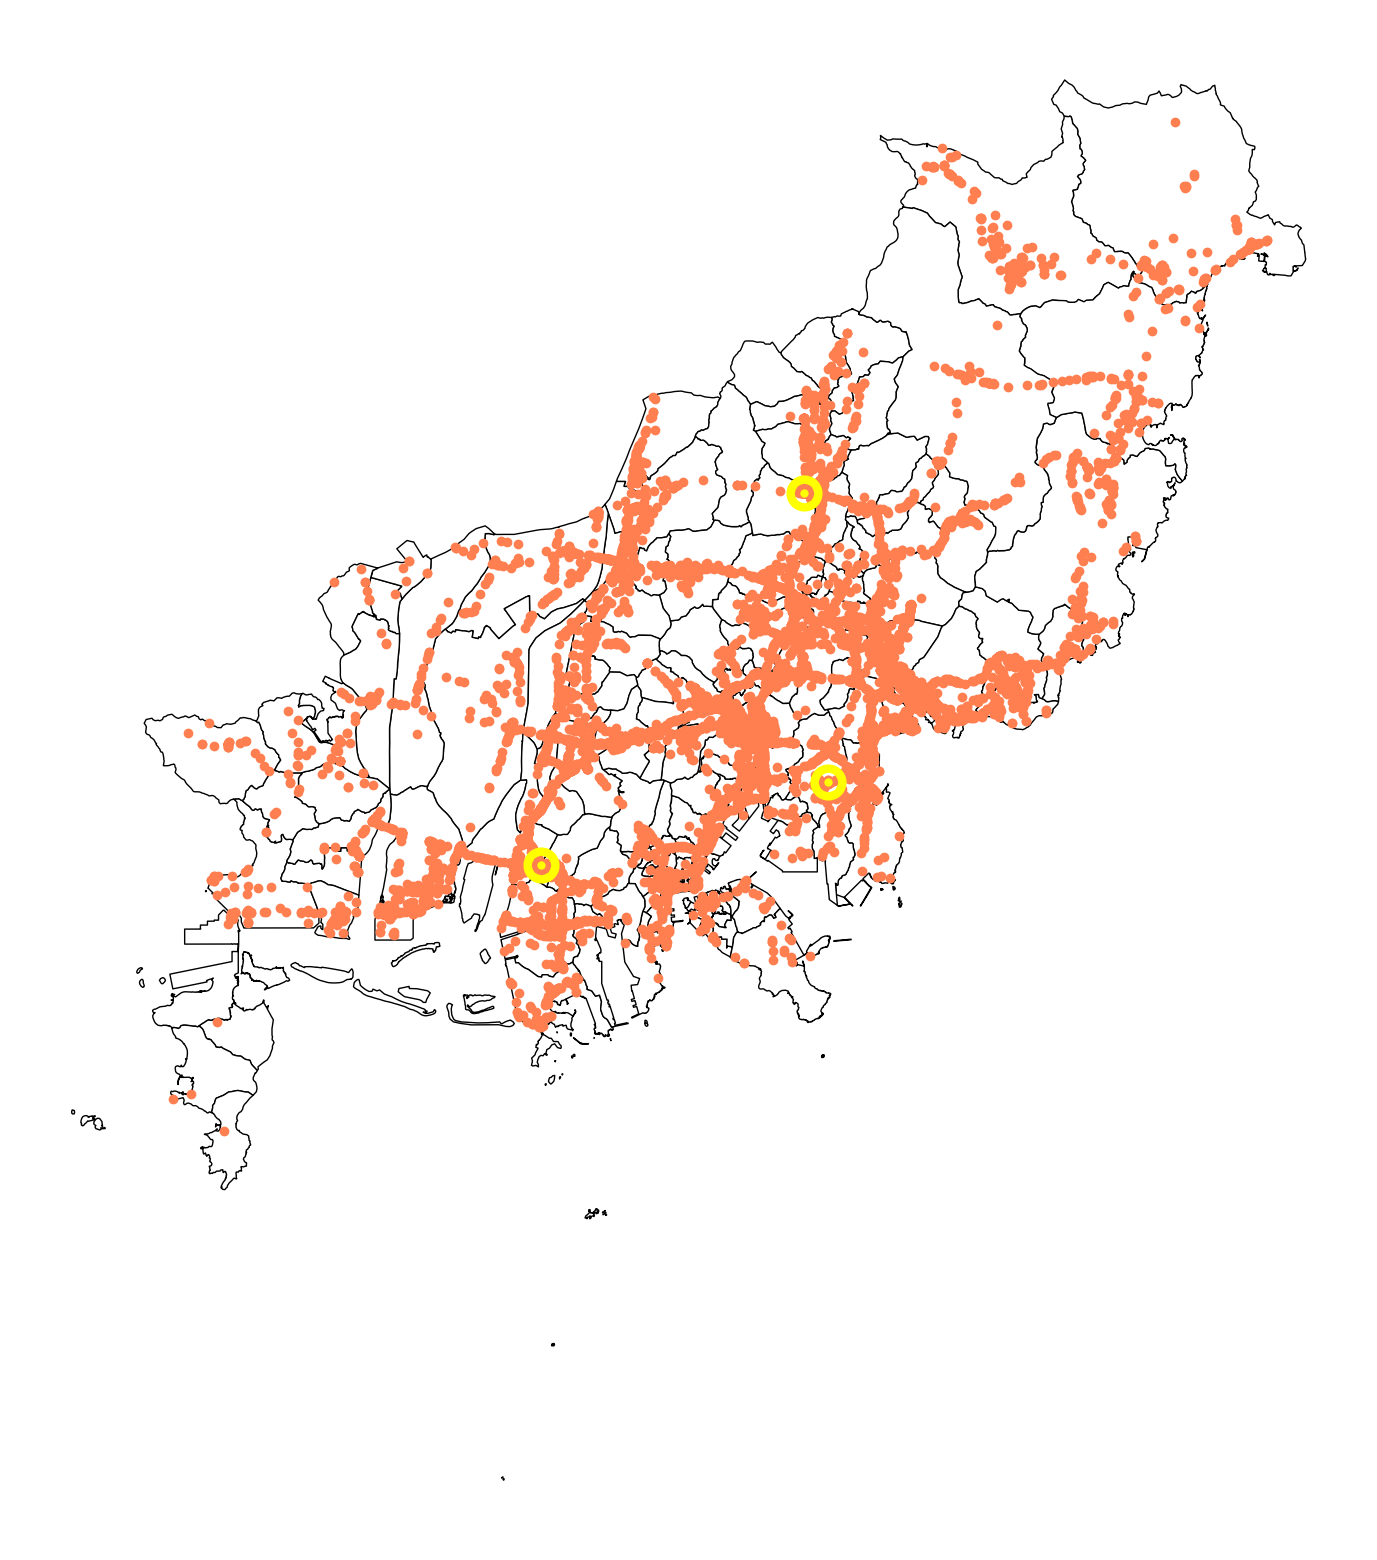

In [56]:
# 불법유턴 + 진로변경위반 + 중앙침범 + 핫스팟
base = busan.plot(figsize=(20, 20), color="w", edgecolor="k")

base.scatter(uturn['경도'],uturn['위도'],color= "coral",linewidths = 1)
base.scatter(course_violation['경도'],course_violation['위도'],color= "coral",linewidths = 1)
base.scatter(center['경도'],center['위도'],color= "coral",linewidths = 1)

base.scatter(hotspot2['경도'],hotspot2['위도'],color= "yellow",linewidths = 20, label='hotspot2')  # 핫스팟

base.set_axis_off()
plt.show()

## 상관성 뒷받침 자료

In [57]:
# GeoDataFrame으로 변환
gdf_진로변경방법위반 = gpd.GeoDataFrame(course_violation, geometry=gpd.points_from_xy(course_violation['경도'], course_violation['위도']))
gdf_중앙선침범 = gpd.GeoDataFrame(center, geometry=gpd.points_from_xy(center['경도'], center['위도']))
gdf_신호위반 = gpd.GeoDataFrame(signal_violation, geometry=gpd.points_from_xy(signal_violation['경도'], signal_violation['위도']))
gdf_불법좌회전 = gpd.GeoDataFrame(left, geometry=gpd.points_from_xy(left['경도'], left['위도']))
gdf_불법유턴 = gpd.GeoDataFrame(uturn, geometry=gpd.points_from_xy(uturn['경도'], uturn['위도']))

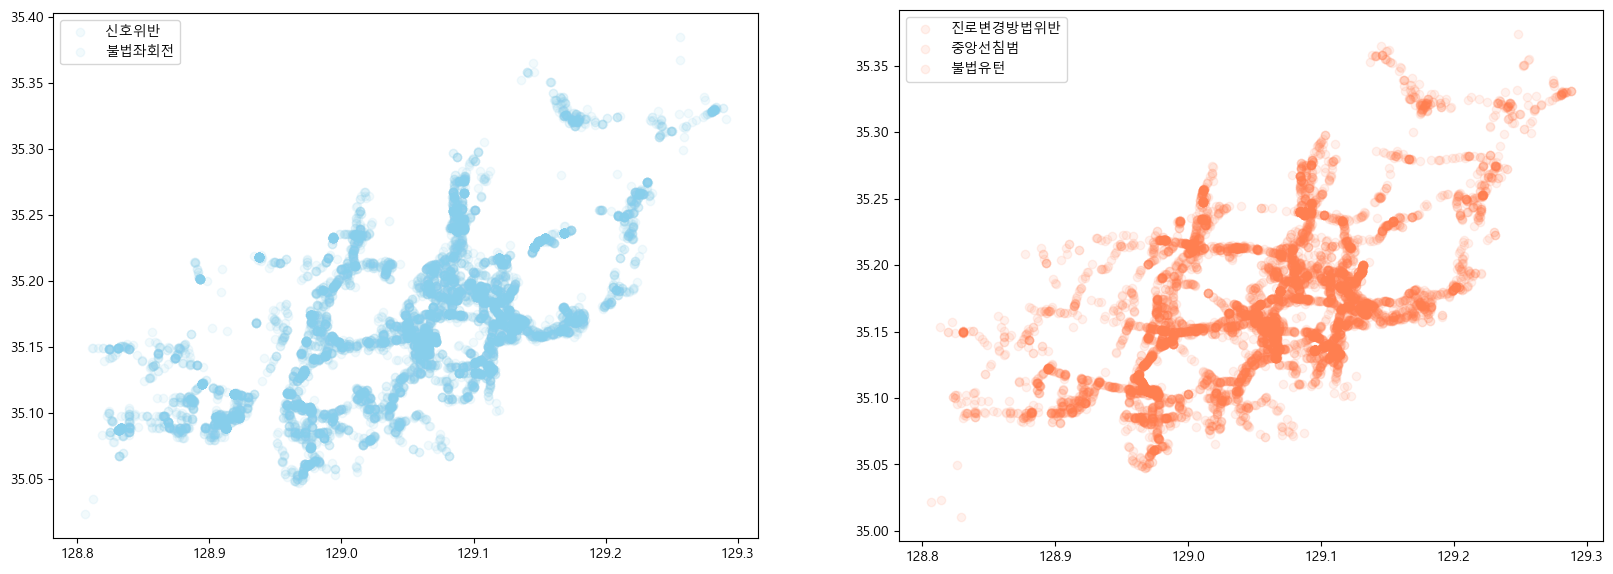

In [58]:
# 그래프 사이즈 설정 및 1x10 서브플롯 생성
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))  # ncols=2

gdf_신호위반.plot(ax=axs[0], color='skyblue', alpha=0.1, label='신호위반')
gdf_불법좌회전.plot(ax=axs[0], color='skyblue', alpha=0.1, label='불법좌회전') 
axs[0].legend()

gdf_진로변경방법위반.plot(ax=axs[1], color='coral', alpha=0.1, label='진로변경방법위반')
gdf_중앙선침범.plot(ax=axs[1], color='coral', alpha=0.1, label='중앙선침범')
gdf_불법유턴.plot(ax=axs[1], color='coral', alpha=0.1, label='불법유턴')   
axs[1].legend()

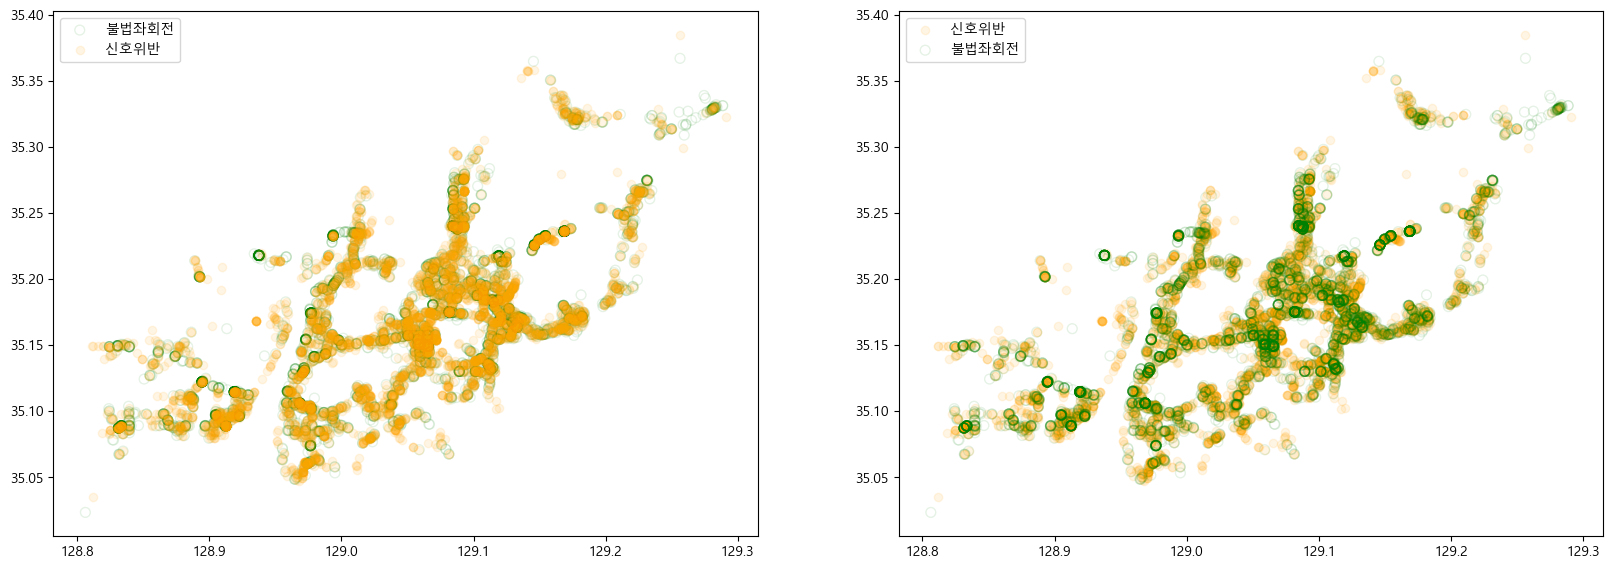

In [59]:
# 그래프 사이즈 설정 및 1x2 서브플롯 생성
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))  # ncols=2

gdf_불법좌회전.plot(ax=axs[0], facecolor='none', color='green', markersize=50, alpha=0.1, label='불법좌회전') 
gdf_신호위반.plot(ax=axs[0], color='orange', alpha=0.1, label='신호위반') 
axs[0].legend()

gdf_신호위반.plot(ax=axs[1], color='orange', alpha=0.1, label='신호위반') 
gdf_불법좌회전.plot(ax=axs[1], facecolor='none', color='green', markersize=50, alpha=0.1, label='불법좌회전') 
axs[1].legend()

plt.show()

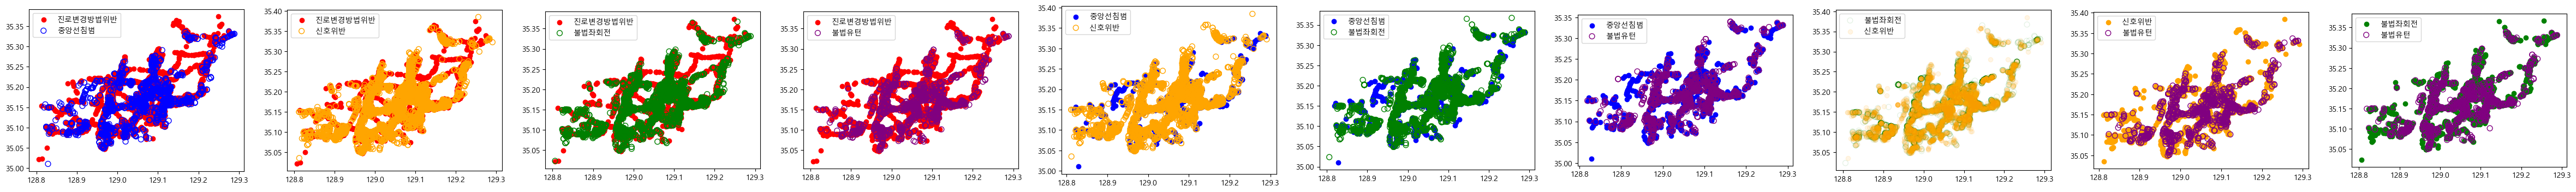

In [60]:
# 그래프 사이즈 설정 및 1x10 서브플롯 생성
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(60, 6))  # ncols=5


# 진로변경방법위반 위치 표시 (첫 번째 서브플롯)
gdf_진로변경방법위반.plot(ax=axs[0], color='red', label='진로변경방법위반')
gdf_중앙선침범.plot(ax=axs[0], facecolor='none', color='blue', markersize=50,label='중앙선침범')   
axs[0].legend()

# 중앙선침범 위치 표시 (두 번째 서브플롯)
gdf_진로변경방법위반.plot(ax=axs[1], color='red', label='진로변경방법위반')
gdf_신호위반.plot(ax=axs[1], facecolor='none', color='orange', markersize=50,label='신호위반')  
axs[1].legend()

# 신호위반 위치 표시 (세 번째 서브플롯)
gdf_진로변경방법위반.plot(ax=axs[2], color='red', label='진로변경방법위반')
gdf_불법좌회전.plot(ax=axs[2], facecolor='none', color='green', markersize=50,label='불법좌회전')  
axs[2].legend()

# 불법좌회전 위치 표시 (네 번째 서브플롯)
gdf_진로변경방법위반.plot(ax=axs[3], color='red', label='진로변경방법위반')
gdf_불법유턴.plot(ax=axs[3], facecolor='none', color='purple', markersize=50,label='불법유턴')  
axs[3].legend()

# 불법유턴 위치 표시 (다섯 번째 서브플롯)
gdf_중앙선침범.plot(ax=axs[4], color='blue', label='중앙선침범')
gdf_신호위반.plot(ax=axs[4], facecolor='none', color='orange', markersize=50,label='신호위반')  
axs[4].legend()

gdf_중앙선침범.plot(ax=axs[5], color='blue', label='중앙선침범')
gdf_불법좌회전.plot(ax=axs[5], facecolor='none', color='green', markersize=50,label='불법좌회전')  
axs[5].legend()

gdf_중앙선침범.plot(ax=axs[6], color='blue', label='중앙선침범')
gdf_불법유턴.plot(ax=axs[6], facecolor='none', color='purple', markersize=50,label='불법유턴')  
axs[6].legend()

gdf_불법좌회전.plot(ax=axs[7], facecolor='none', color='green', markersize=50, alpha=0.1, label='불법좌회전') 
gdf_신호위반.plot(ax=axs[7], color='orange', alpha=0.1, label='신호위반') 
axs[7].legend()

gdf_신호위반.plot(ax=axs[8], color='orange', label='신호위반')
gdf_불법유턴.plot(ax=axs[8], facecolor='none', color='purple', markersize=50,label='불법유턴')  
axs[8].legend()

gdf_불법좌회전.plot(ax=axs[9], color='green', label='불법좌회전')
gdf_불법유턴.plot(ax=axs[9], facecolor='none', color='purple', markersize=50,label='불법유턴')  
axs[9].legend()

plt.show()

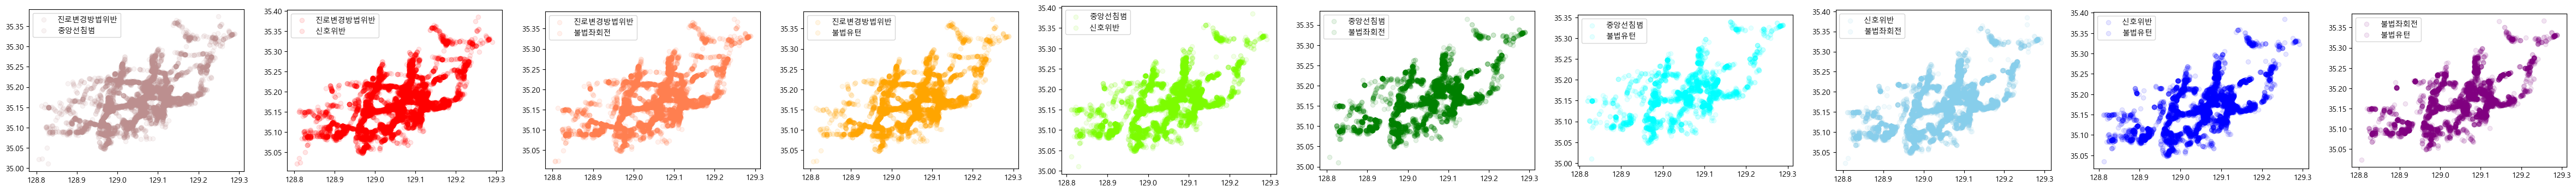

In [61]:
# 그래프 사이즈 설정 및 1x10 서브플롯 생성
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(60, 6))  # ncols=5


# 진로변경방법위반 위치 표시 (첫 번째 서브플롯)
gdf_진로변경방법위반.plot(ax=axs[0], color='rosybrown', alpha=0.1, label='진로변경방법위반')
gdf_중앙선침범.plot(ax=axs[0], color='rosybrown', alpha=0.1, label='중앙선침범')   
axs[0].legend()

# 중앙선침범 위치 표시 (두 번째 서브플롯)
gdf_진로변경방법위반.plot(ax=axs[1], color='red', alpha=0.1, label='진로변경방법위반')
gdf_신호위반.plot(ax=axs[1], color='red', alpha=0.1, label='신호위반')  
axs[1].legend()

# 신호위반 위치 표시 (세 번째 서브플롯)
gdf_진로변경방법위반.plot(ax=axs[2], color='coral', alpha=0.1, label='진로변경방법위반')
gdf_불법좌회전.plot(ax=axs[2], color='coral', alpha=0.1, label='불법좌회전')  
axs[2].legend()

# 불법좌회전 위치 표시 (네 번째 서브플롯)
gdf_진로변경방법위반.plot(ax=axs[3], color='orange', alpha=0.1, label='진로변경방법위반')
gdf_불법유턴.plot(ax=axs[3], color='orange', alpha=0.1, label='불법유턴')  
axs[3].legend()

# 불법유턴 위치 표시 (다섯 번째 서브플롯)
gdf_중앙선침범.plot(ax=axs[4], color='lawngreen', alpha=0.1, label='중앙선침범')
gdf_신호위반.plot(ax=axs[4], color='lawngreen', alpha=0.1, label='신호위반')  
axs[4].legend()

gdf_중앙선침범.plot(ax=axs[5], color='green', alpha=0.1, label='중앙선침범')
gdf_불법좌회전.plot(ax=axs[5], color='green', alpha=0.1, label='불법좌회전')  
axs[5].legend()

gdf_중앙선침범.plot(ax=axs[6], color='aqua', alpha=0.1, label='중앙선침범')
gdf_불법유턴.plot(ax=axs[6], color='aqua', alpha=0.1, label='불법유턴')  
axs[6].legend()

gdf_신호위반.plot(ax=axs[7], color='skyblue', alpha=0.1, label='신호위반')
gdf_불법좌회전.plot(ax=axs[7], color='skyblue', alpha=0.1, label='불법좌회전') 
axs[7].legend()

gdf_신호위반.plot(ax=axs[8], color='blue', alpha=0.1, label='신호위반')
gdf_불법유턴.plot(ax=axs[8], color='blue', alpha=0.1, label='불법유턴')  
axs[8].legend()

gdf_불법좌회전.plot(ax=axs[9], color='purple', alpha=0.1, label='불법좌회전')
gdf_불법유턴.plot(ax=axs[9], color='purple', alpha=0.1, label='불법유턴')  
axs[9].legend()



plt.show()